---

##**OVERVIEW**

This project focuses on analyzing a dataset of movies containing information on **titles, genres, release years, budgets, revenues, ratings, votes, directors, and lead actors**. The primary objective is to explore patterns and relationships within the film industry that connect financial success, critical reception, and production factors.

The dataset allows for a variety of perspectives, including:

* **Financial Analysis**: Examining budgets, revenues, and profitability (ROI) across genres, countries, and decades.
* **Critical vs. Commercial Success**: Comparing audience ratings (IMDb) and critic scores (Rotten Tomatoes) with box office performance to assess whether critical acclaim translates into higher earnings.
* **Star Power and Directorial Influence**: Identifying top-performing and most consistent actors and directors based on both ratings and revenue.
* **Temporal Trends**: Analyzing how movie production and performance have changed over time, including annual and decade-wise patterns.
* **Genre Insights**: Exploring the popularity, profitability, and audience reception of different genres.

The goal of the report is to derive **actionable insights** about what factors contribute most to a movie’s success financially and critically and to highlight patterns that could help studios, investors, or researchers understand the evolving dynamics of the global film industry.

---




##**OBJECTIVE**
The objective of this report is to analyse the global movie industry across multiple dimensions—including profitability, box office performance, audience and critic ratings, budget-revenue relationships, director and actor consistency, and genre-based trends. By examining financial, critical, and temporal factors, the study aims to identify the key drivers of commercial success, highlight discrepancies between critical acclaim and audience reception, and evaluate the stability and variability of performance across different genres, countries, decades, and industry stakeholders. This holistic approach provides insights into both the artistic and commercial aspects of cinema, offering valuable takeaways for filmmakers, investors, and researchers.

---

##**1.0 Loading data from google drive**

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Datasets/movies_dataset.csv'

try:
    df = pd.read_csv(file_path)
    print("CSV file imported successfully!")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please double-check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

Mounted at /content/drive
CSV file imported successfully!


,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor
0,1,Might toward capital,Comedy,2003,28-09-2003,China,6577427.79,6613685.82,15472035.66,1778530.85,3034053.32,6.2,58,7865,10596,Kristina Moore,Brian Mccormick
1,2,He however experience,Comedy,1988,14-02-1988,USA,1883810.10,1930949.15,3637731.12,247115.74,831828.84,5.2,44,1708,220,Benjamin Hudson,Ashley Pena
2,3,Star responsibility politics,Comedy,1971,02-11-1971,USA,2468079.29,4186694.69,7165111.24,878453.95,2171405.93,5.5,55,4678,7805,Kayla Young,Alexander Haley
3,4,Exactly live,Comedy,1998,06-08-1998,USA,1447311.46,2023683.92,4373820.26,570657.72,898886.01,7.3,87,2467,1751,Michael Ross,Patrick Barnett
4,5,Focus improve especially,Documentary,2021,17-12-2021,India,900915.86,2129629.10,3113017.38,361189.37,861775.91,6.1,67,5555,697,Faith Franklin,Duane Fletcher DDS


##**2.0 Data description**

In [ ]:
df.shape

(999999, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MovieID               999999 non-null  int64  
 1   Title                 999999 non-null  object 
 2   Genre                 999999 non-null  object 
 3   ReleaseYear           999999 non-null  int64  
 4   ReleaseDate           999999 non-null  object 
 5   Country               999999 non-null  object 
 6   BudgetUSD             999999 non-null  float64
 7   US_BoxOfficeUSD       999999 non-null  float64
 8   Global_BoxOfficeUSD   999999 non-null  float64
 9   Opening_Day_SalesUSD  999999 non-null  float64
 10  One_Week_SalesUSD     999999 non-null  float64
 11  IMDbRating            999999 non-null  float64
 12  RottenTomatoesScore   999999 non-null  int64  
 13  NumVotesIMDb          999999 non-null  int64  
 14  NumVotesRT            999999 non-null  int64  
 15  

---

## **Dataset Information**

The dataset contains 999,999 entries and 17 columns. The columns include information about movies like details on production, performance, and audience/critic reception. It includes 17 variables, covering both categorical and numerical information.

###Variable Description

1. **MovieID** *(int)* – Unique identifier for each movie.
2. **Title** *(object/string)* – Name of the movie.
3. **Genre** *(object/string)* – Category of the movie (e.g., Comedy, Drama, Documentary, etc.).
4. **ReleaseYear** *(int)* – Year in which the movie was released.
5. **ReleaseDate** *(object/string)* – Exact release date of the movie.
6. **Country** *(object/string)* – Country of origin/production of the movie.
7. **BudgetUSD** *(float)* – Estimated production budget in US dollars.
8. **US\_BoxOfficeUSD** *(float)* – Box office revenue generated in the United States.
9. **Global\_BoxOfficeUSD** *(float)* – Worldwide box office revenue.
10. **Opening\_Day\_SalesUSD** *(float)* – Revenue earned on the opening day.
11. **One\_Week\_SalesUSD** *(float)* – Revenue generated in the first week.
12. **IMDbRating** *(float)* – Average IMDb rating (audience-based, scale 1–10).
13. **RottenTomatoesScore** *(int)* – Rotten Tomatoes critic score (percentage, 0–100).
14. **NumVotesIMDb** *(int)* – Number of audience votes on IMDb.
15. **NumVotesRT** *(int)* – Number of critic/audience ratings on Rotten Tomatoes.
16. **Director** *(object/string)* – Director of the movie.
17. **LeadActor** *(object/string)* – Lead actor starring in the movie.


### Summary

The dataset is comprehensive, covering financial aspects (budget, revenues, ROI), audience/critic perception (IMDb, Rotten Tomatoes), and metadata (genre, year, country, director, actors). It enables multi-dimensional analysis of what drives a movie’s success and reception across time, regions, and genres.

---

##2.1 Categorical and Non-categorical variables

In [ ]:
# Identify Index Variables (assuming 'MovieID' is the index based on the name and data type)
index_variables = ['MovieID']

# Identify Categorical Variables
categorical_variables = {
    'Nominal': [],
    'Ordinal': []
}

# Identify Non-Categorical, Non-Index Variables (Numerical)
non_categorical_variables = []

for col in df.columns:
    if col not in index_variables:
        if df[col].dtype == 'object':
            # For object type, check the number of unique values to classify as nominal or potentially ordinal
            if df[col].nunique() < 50: # Threshold for considering as categorical
                 # Further inspection might be needed to confirm if it's nominal or ordinal
                 # For simplicity, we'll initially put object types with low unique values into nominal
                 categorical_variables['Ordinal'].append(col)
            else:
                # Object types with many unique values are likely not categorical in the traditional sense
                categorical_variables['Nominal'].append(col)
        elif df[col].dtype in ['int64', 'float64']:
            # Numerical types can be non-categorical or potentially ordinal if they represent ranks/scores
            # Without further context, we'll assume they are non-categorical unless they have a clear ordinal meaning
            if col in ['IMDbRating', 'RottenTomatoesScore']: # Assuming these are scores/ratings with some order
                 categorical_variables['Ordinal'].append(col)
            else:
                non_categorical_variables.append(col)


print("Index Variables:", index_variables)
print("\nCategorical Variables:")
print("  Nominal:", categorical_variables['Nominal'])
print("  Ordinal:", categorical_variables['Ordinal'])
print("\nNon-Categorical, Non-Index Variables:", non_categorical_variables)

Index Variables: ['MovieID']

Categorical Variables:
  Nominal: ['Title', 'ReleaseDate', 'Director', 'LeadActor']
  Ordinal: ['Genre', 'Country', 'IMDbRating', 'RottenTomatoesScore']

Non-Categorical, Non-Index Variables: ['ReleaseYear', 'BudgetUSD', 'US_BoxOfficeUSD', 'Global_BoxOfficeUSD', 'Opening_Day_SalesUSD', 'One_Week_SalesUSD', 'NumVotesIMDb', 'NumVotesRT', 'IMDbRating_normalized', 'Rating_Discrepancy']


##2.2 Descriptive Statistics of the Categorical Variables

In [ ]:
# Display descriptive statistics for the specified categorical variables
specified_categorical_variables = ['Genre', 'Country', 'Director', 'LeadActor']

print("Descriptive Statistics for Categorical Variables:")

for col in specified_categorical_variables:
    if col in df.columns:
        print(f"\n--- {col} ---")

        # Calculate Frequency
        frequency = df[col].value_counts()
        print("\nFrequency:")
        display(frequency)

        # Calculate Relative Frequency
        relative_frequency = df[col].value_counts(normalize=True) * 100
        print("\nRelative Frequency in (%) :")
        display(relative_frequency)
    else:
        print(f"Column '{col}' not found in the dataframe.")

Descriptive Statistics for Categorical Variables:

--- Genre ---

Frequency:


,count
Genre,
Drama,250018
Comedy,199832
Action,150131
Thriller,100071
Romance,100021
Horror,100010
Documentary,50114
Sci-Fi,49802



Relative Frequency in (%) :


,proportion
Genre,
Drama,25.001825
Comedy,19.983220
Action,15.013115
Thriller,10.007110
Romance,10.002110
Horror,10.001010
Documentary,5.011405
Sci-Fi,4.980205



--- Country ---

Frequency:


,count
Country,
USA,714581
UK,51277
India,50984
Canada,40528
China,30952
Australia,30587
France,30471
Japan,20222
Germany,20211



Relative Frequency in (%) :


,proportion
Country,
USA,71.458171
UK,5.127705
India,5.098405
Canada,4.052804
China,3.095203
Australia,3.058703
France,3.047103
Japan,2.022202
Germany,2.021102



--- Director ---

Frequency:


,count
Director,
Tara Underwood,6898
Melissa Hernandez,6862
Caitlin Brewer,6830
Brian Robinson,6818
Rachel Hayes,6794
...,...
Jerry Owens,6494
Shannon Ross,6489
Mrs. Hannah Campbell DDS,6484



Relative Frequency in (%) :


,proportion
Director,
Tara Underwood,0.689801
Melissa Hernandez,0.686201
Caitlin Brewer,0.683001
Brian Robinson,0.681801
Rachel Hayes,0.679401
...,...
Jerry Owens,0.649401
Shannon Ross,0.648901
Mrs. Hannah Campbell DDS,0.648401



--- LeadActor ---

Frequency:


,count
LeadActor,
Jeffrey Smith,6688
Nathan Nelson,3485
Mark Morris,3467
Michael Gomez,3463
Courtney Butler,3455
...,...
Ashley Gilmore,3216
Anna Vasquez,3209
Becky Dean,3197



Relative Frequency in (%) :


,proportion
LeadActor,
Jeffrey Smith,0.668801
Nathan Nelson,0.348500
Mark Morris,0.346700
Michael Gomez,0.346300
Courtney Butler,0.345500
...,...
Ashley Gilmore,0.321600
Anna Vasquez,0.320900
Becky Dean,0.319700


/tmp/ipython-input-2720301990.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index, palette='viridis')


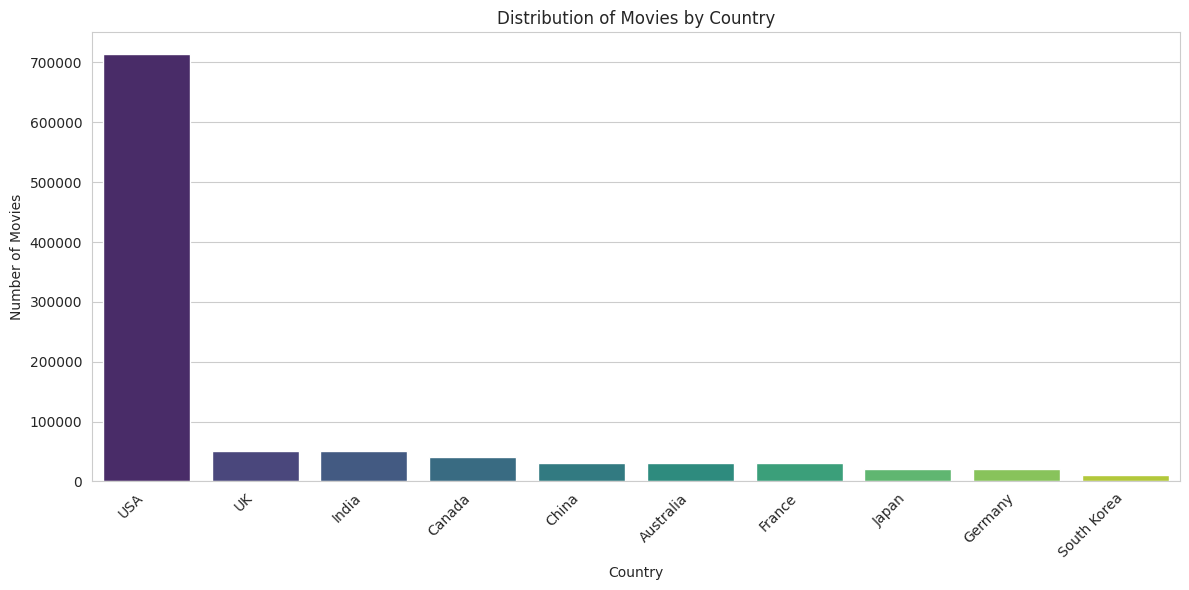

/tmp/ipython-input-2720301990.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index, palette='viridis')


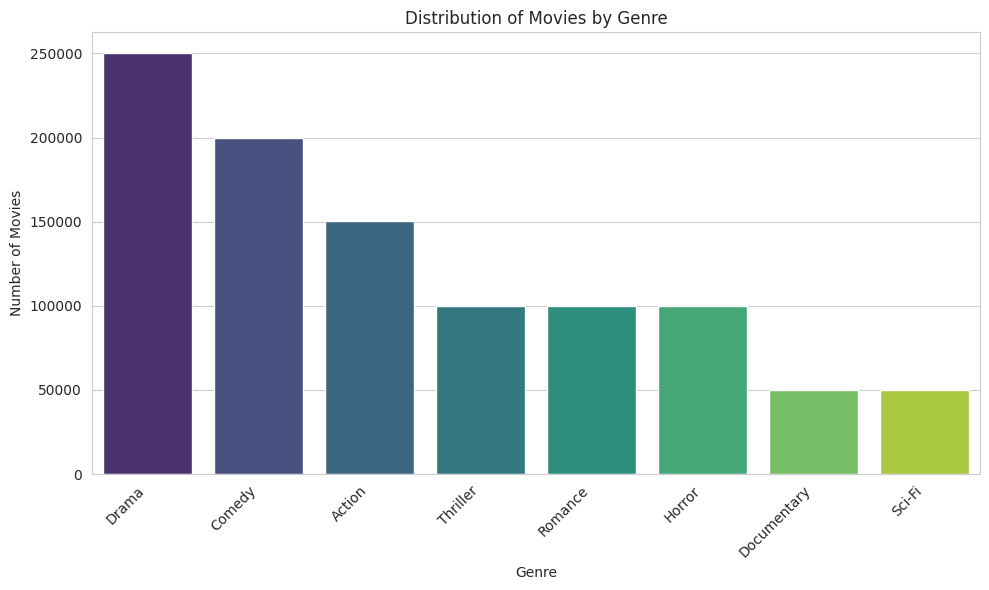

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Create a bar plot for 'Country'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index, palette='viridis')
plt.title('Distribution of Movies by Country')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a bar plot for 'Genre'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index, palette='viridis')
plt.title('Distribution of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---
### Inference Note on Descriptive Statistics of Categorical Variables

Based on the descriptive statistics for the categorical variables:

*   **Genre:** 'Drama' is the most frequent genre, followed by 'Comedy' and 'Action'. This indicates a higher volume of movies produced in these genres within the dataset.
*   **Country:** The United States (USA) dominates the dataset in terms of the number of movies, significantly outweighing other countries. This suggests the dataset is heavily skewed towards the American film industry.
*   **Director and Lead Actor:** The dataset contains a large number of unique directors and lead actors, with no single individual having an overwhelmingly large number of movie credits compared to others. The distribution across directors and lead actors appears relatively spread out, although there are individuals with more credits than others.

These observations provide a foundational understanding of the distribution and representation of different categories within the movie dataset.

---

##2.3 Descriptive Statistics of the Non-Categorical variables

In [ ]:
# Identify non-categorical variables to include (excluding the specified ones)
non_categorical_variables_to_include = [col for col in non_categorical_variables if col not in ['ReleaseYear', 'NumVotesIMDb', 'NumVotesRT']]

print("Descriptive Statistics for Non-Categorical Variables :")

# Display Measures of Central Tendency and Dispersion
print("\nMeasures of Central Tendency and Dispersion:")
display(df[non_categorical_variables_to_include].describe())

# Display Measures of Correlation (Pearson correlation)
print("\nMeasures of Correlation:")
display(df[non_categorical_variables_to_include].corr())

Descriptive Statistics for Non-Categorical Variables :

Measures of Central Tendency and Dispersion:


,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating_normalized,Rating_Discrepancy
count,9.999990e+05,9.999990e+05,9.999990e+05,9.999990e+05,9.999990e+05,999999.000000,999999.000000
mean,9.802824e+06,1.496163e+07,2.720625e+07,2.992745e+06,7.483442e+06,64.947880,7.832196
std,2.249421e+07,3.879403e+07,6.954294e+07,8.132438e+06,1.955337e+07,14.856064,5.954863
min,1.000000e+05,4.002547e+04,1.000000e+05,4.050470e+03,1.650742e+04,10.000000,0.000000
25%,1.190511e+06,1.489805e+06,2.762370e+06,2.790262e+05,7.383145e+05,55.000000,3.000000
50%,3.265790e+06,4.388876e+06,8.090223e+06,8.387221e+05,2.179436e+06,65.000000,7.000000
75%,9.002791e+06,1.287606e+07,2.355245e+07,2.510360e+06,6.415143e+06,75.000000,11.000000
max,3.000000e+08,1.018198e+09,1.499497e+09,2.957511e+08,5.795551e+08,100.000000,48.000000



Measures of Correlation:


,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating_normalized,Rating_Discrepancy
BudgetUSD,1.000000,0.882692,0.895459,0.841636,0.875719,0.001067,0.000259
US_BoxOfficeUSD,0.882692,1.000000,0.985941,0.954800,0.992408,0.001282,-0.000783
Global_BoxOfficeUSD,0.895459,0.985941,1.000000,0.940976,0.978419,0.001211,-0.000561
Opening_Day_SalesUSD,0.841636,0.954800,0.940976,1.000000,0.947500,0.000635,-0.000904
One_Week_SalesUSD,0.875719,0.992408,0.978419,0.947500,1.000000,0.001222,-0.000726
IMDbRating_normalized,0.001067,0.001282,0.001211,0.000635,0.001222,1.000000,-0.046034
Rating_Discrepancy,0.000259,-0.000783,-0.000561,-0.000904,-0.000726,-0.046034,1.000000


---
### Inference Note on Descriptive Statistics of Non-Categorical Variables

Based on the descriptive statistics for the non-categorical variables:

*   **Measures of Central Tendency and Dispersion:** The describe() output shows the count, mean, standard deviation, minimum, maximum, and quartiles for numerical columns like Budget, Box Office revenues, and sales. We can see a wide range in values, particularly for revenue and budget, indicated by the large standard deviations and the difference between the minimum/maximum and the mean/median. This suggests a skewed distribution, with a few high-budget/high-grossing movies influencing the averages.
*   **Measures of Correlation:** The correlation matrix reveals strong positive correlations between BudgetUSD, US_BoxOfficeUSD, Global_BoxOfficeUSD, Opening_Day_SalesUSD, and One_Week_SalesUSD. This indicates that movies with higher budgets tend to perform better in terms of box office revenue and sales. Global_BoxOfficeUSD and US_BoxOfficeUSD are highly correlated with One_Week_SalesUSD, suggesting that early sales are a strong indicator of overall box office performance.

These observations highlight the significant variability in financial performance within the dataset and the strong relationships between budget, early sales, and overall box office success.

---

##**3.0 Analysis**

##3.1 Ten most profitable movies
* Identifies the top films with the highest profitability based on revenue versus budget.

In [ ]:
# Calculate profit
df['ProfitUSD'] = df['Global_BoxOfficeUSD'] - df['BudgetUSD']

# Sort by profit in descending order and get the top 10
top_10_profitable_movies = df.sort_values(by='ProfitUSD', ascending=False).head(10)

print("Top 10 Most Profitable Movies:")
display(top_10_profitable_movies[['Title', 'Genre', 'ReleaseYear', 'BudgetUSD', 'Global_BoxOfficeUSD', 'ProfitUSD']])

Top 10 Most Profitable Movies:


,Title,Genre,ReleaseYear,BudgetUSD,Global_BoxOfficeUSD,ProfitUSD
220370,Scientist picture,Documentary,1977,300000000.0,1.499497e+09,1.199497e+09
334338,Among religious night,Comedy,2013,300000000.0,1.499468e+09,1.199468e+09
788782,Happy religious serious citizen,Sci-Fi,2003,300000000.0,1.496190e+09,1.196190e+09
970554,Free cup day tree,Drama,1951,300000000.0,1.495816e+09,1.195816e+09
504069,Cut,Drama,2000,300000000.0,1.495192e+09,1.195192e+09
10947,Seem fish send people,Comedy,2009,300000000.0,1.494807e+09,1.194807e+09
34110,Production five rule,Thriller,2003,300000000.0,1.493572e+09,1.193572e+09
924737,Which team deep,Comedy,2024,300000000.0,1.492660e+09,1.192660e+09
932597,Serve view,Drama,1984,300000000.0,1.489686e+09,1.189686e+09
194388,Take exist good,Comedy,2020,300000000.0,1.487864e+09,1.187864e+09


>**Interpretation**: The top 10 most profitable movies each achieved profits in the range of 1.18 - 1.20 billion dollars, with budgets of 300 million dollars and global revenues close to 1.49 billion dollars. Comedy and Drama dominate the list, though Documentary, Sci-Fi, and Thriller are also represented, showing that profitability is not restricted to a single genre. These movies span release years from 1951 to 2024, indicating that blockbuster profitability has remained consistent across decades rather than being limited to modern cinema. Despite the substantial budgets involved, these films delivered nearly five times returns, demonstrating that while big-budget productions carry higher risk, they also generate the greatest profits, particularly when paired with popular genres such as Comedy and Drama.

##3.2 Revenue by genre
* Compares total and average earnings across different movie genres.

In [ ]:
# Group by Genre and calculate the average of Global_BoxOfficeUSD and US_BoxOfficeUSD
genre_box_office_average = df.groupby('Genre')[['Global_BoxOfficeUSD', 'US_BoxOfficeUSD']].mean()

# Sort the data in descending order of Global_BoxOfficeUSD
genre_box_office_average_sorted = genre_box_office_average.sort_values(by='Global_BoxOfficeUSD', ascending=False)

print("Average Global and US Box Office Revenue by Genre (Sorted by Global Box Office):")
display(genre_box_office_average_sorted)

Average Global and US Box Office Revenue by Genre (Sorted by Global Box Office):


,Global_BoxOfficeUSD,US_BoxOfficeUSD
Genre,,
Documentary,2.758178e+07,1.515494e+07
Horror,2.748073e+07,1.514113e+07
Thriller,2.743435e+07,1.511368e+07
Romance,2.728314e+07,1.497798e+07
Comedy,2.721993e+07,1.496091e+07
Drama,2.715240e+07,1.492415e+07
Sci-Fi,2.697233e+07,1.484380e+07
Action,2.684386e+07,1.476777e+07


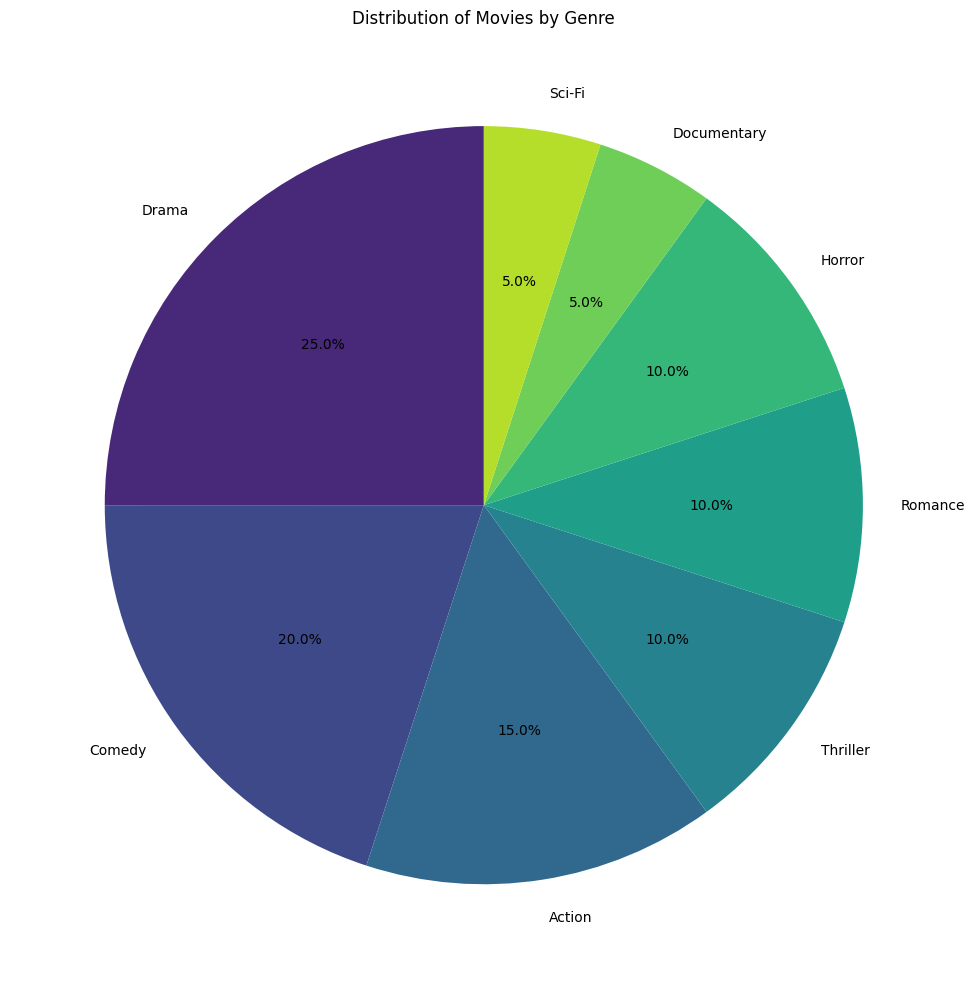

In [ ]:
# Create a pie chart for 'Genre' distribution
plt.figure(figsize=(10, 10))
df['Genre'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(df['Genre'].unique())))
plt.title('Distribution of Movies by Genre')
plt.ylabel('') # Remove default 'Genre' label on y-axis
plt.tight_layout()
plt.show()



> **Interpretation**: The data shows that Documentaries have the highest average global (27.58M dollars) and U.S. (15.15M dollars) box office revenues, slightly outperforming other genres. Horror and Thriller follow closely, while Action and Sci-Fi, despite their popularity, report the lowest averages in this dataset.
The differences, however, are relatively small (all between 26.8M - 27.6M dollars globally), suggesting that revenue potential is fairly balanced across genres. This indicates that genre alone is not the primary driver of revenue, and other factors (budget, marketing, star power, timing) may play a stronger role in box office success.



##3.3 Highest-rated movies by genre
* Highlights the best-rated films within each genre using IMDb and Rotten Tomatoes scores.

In [ ]:
# Group by Genre and calculate the average IMDbRating
average_imdb_rated_movies = df.groupby('Genre')['IMDbRating'].mean().reset_index()

# Sort the data in descending order of average IMDbRating
average_imdb_rated_movies_sorted = average_imdb_rated_movies.sort_values(by='IMDbRating', ascending=False)

print("Average IMDbRating by Genre (Sorted in Descending Order):")
display(average_imdb_rated_movies_sorted[['Genre', 'IMDbRating']])

Average IMDbRating by Genre (Sorted in Descending Order):


,Genre,IMDbRating
2,Documentary,6.500856
4,Horror,6.499671
1,Comedy,6.499408
6,Sci-Fi,6.498530
0,Action,6.495995
7,Thriller,6.495319
5,Romance,6.491912
3,Drama,6.487393


>**Interpretation**: The average IMDb ratings across genres are very close, ranging from 6.49 to 6.50, indicating that audiences rate most genres similarly. Documentaries have the highest average rating (6.50), suggesting slightly stronger audience appreciation, while Drama has the lowest (6.49). However, the differences are marginal, highlighting that audience ratings are fairly consistent across genres, with no genre showing a clear advantage in terms of overall critical reception.

In [ ]:
# Find the movie with the highest RottenTomatoesScore for each genre
highest_rt_rated_movies = df.groupby('Genre')['RottenTomatoesScore'].mean().reset_index()

# Sort the data in descending order of average RottenTomatoesScore
highest_rt_rated_movies = highest_rt_rated_movies.sort_values(by='RottenTomatoesScore', ascending=False)

print("\nMovies with the Highest average RottenTomatoesScore by Genre:")
display(highest_rt_rated_movies[['Genre', 'RottenTomatoesScore']])


Movies with the Highest average RottenTomatoesScore by Genre:


,Genre,RottenTomatoesScore
4,Horror,64.847095
0,Action,64.807408
1,Comedy,64.801333
7,Thriller,64.790459
5,Romance,64.781836
2,Documentary,64.747576
6,Sci-Fi,64.725132
3,Drama,64.717864


>**Interpretation**: The average Rotten Tomatoes scores across genres are closely clustered, ranging from 64.71 to 64.85, showing that critics evaluate most genres at a similar level. Horror movies top the list with the highest average score (64.85), followed by Action and Comedy, while Drama records the lowest average (64.71). Although the differences are minimal, this suggests that certain genres like Horror and Action may receive slightly stronger critical recognition, whereas Drama tends to score comparatively lower.

##3.4 Movies with the biggest discrepancy between IMDb and Rotten Tomatoes scores
* Examines films where audience and critic ratings differ significantly.

In [ ]:
# Normalize IMDbRating (scale of 1-10) to a scale of 0-100
df['IMDbRating_normalized'] = df['IMDbRating'] * 10

# Calculate the absolute difference between normalized scores
df['Rating_Discrepancy'] = abs(df['IMDbRating_normalized'] - df['RottenTomatoesScore'])

# Sort by discrepancy in descending order and get the top movies
top_discrepancy_movies = df.sort_values(by='Rating_Discrepancy', ascending=False)

print("Movies with the Biggest Discrepancy Between IMDb and Rotten Tomatoes Scores:")
display(top_discrepancy_movies[['Title', 'Genre', 'IMDbRating_normalized', 'RottenTomatoesScore', 'Rating_Discrepancy']].head(10))

Movies with the Biggest Discrepancy Between IMDb and Rotten Tomatoes Scores:


,Title,Genre,IMDbRating_normalized,RottenTomatoesScore,Rating_Discrepancy
84042,Answer billion ok method,Comedy,66.0,18,48.0
136816,Natural sing buy,Comedy,44.0,91,47.0
102912,Enough cold pretty,Documentary,81.0,36,45.0
10087,Picture live effect,Romance,85.0,41,44.0
455980,Apply sport value,Comedy,56.0,100,44.0
274942,Half strategy available,Drama,49.0,5,44.0
630940,But most performance,Drama,33.0,77,44.0
439055,Conference baby,Horror,86.0,43,43.0
812603,Case since,Comedy,81.0,38,43.0
361997,Myself,Sci-Fi,80.0,37,43.0


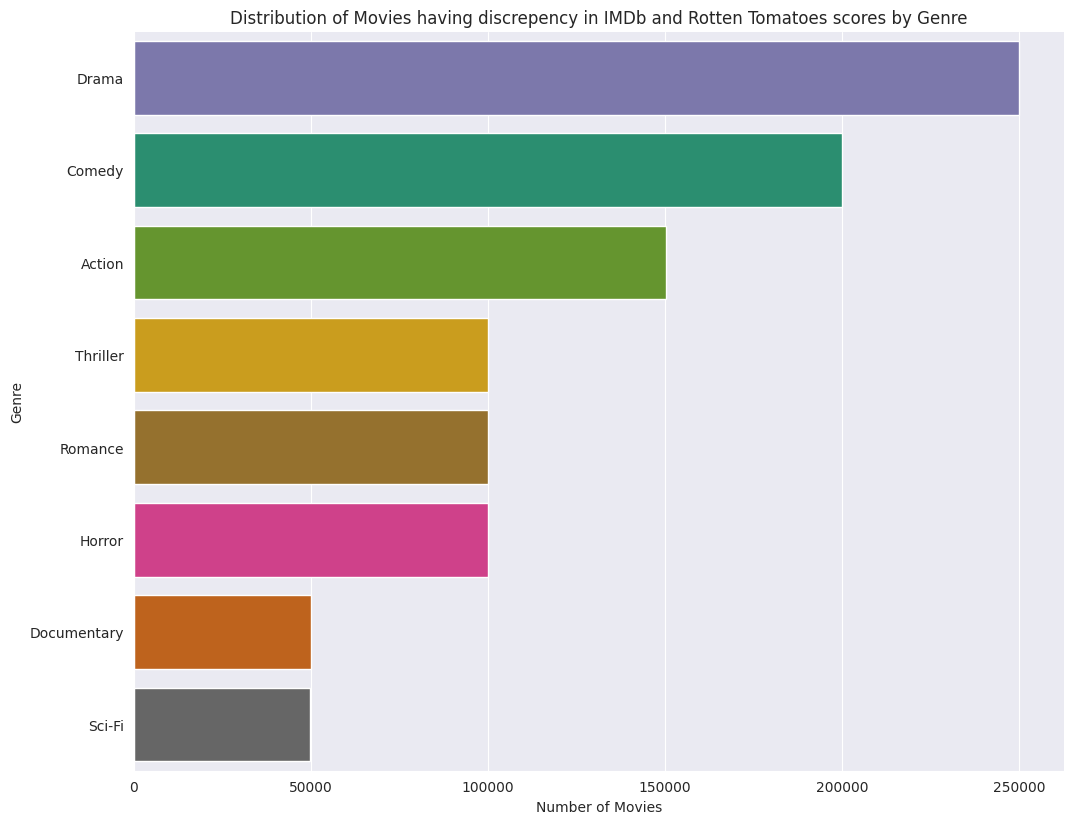

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Genre'].unique()))
plt.figure(figsize=figsize)
plt.title('Distribution of Movies having discrepency in IMDb and Rotten Tomatoes scores by Genre')
sns.countplot(data=df, y='Genre', order=df['Genre'].value_counts().index, palette='Dark2', hue='Genre', legend=False)
plt.xlabel('Number of Movies')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

>**Interpretation**:
The movies listed show the largest gaps between IMDb audience ratings and Rotten Tomatoes critic scores, with discrepancies ranging from 43 to 48 points. Interestingly, this mismatch appears across multiple genres—Comedy, Drama, Romance, Documentary, Horror, and Sci-Fi—suggesting that differences in audience and critic perceptions are not tied to a specific genre. Some films, like Answer billion ok method (IMDb 66 vs. RT 18), were favored by audiences but poorly received by critics, while others, such as Natural sing buy (IMDb 44 vs. RT 91), had the opposite pattern. Overall, this highlights how audience and critic evaluations can diverge significantly, reflecting different perspectives on movie quality.

##3.5 Annual trends in movie production (2023 and 2024)
* Tracks year-over-year changes in the number of films released.

In [ ]:
# Filter the DataFrame for the years 2023 and 2024
df_2023_2024 = df[df['ReleaseYear'].isin([2023, 2024])]

# Group by ReleaseYear and Genre and count the number of movies
genre_annual_trends = df_2023_2024.groupby(['ReleaseYear', 'Genre']).size().unstack(fill_value=0)

print("Number of Movies Released in 2023 and 2024 by Genre:")
display(genre_annual_trends)

Number of Movies Released in 2023 and 2024 by Genre:


Genre,Action,Comedy,Documentary,Drama,Horror,Romance,Sci-Fi,Thriller
ReleaseYear,,,,,,,,
2023,3540,4628,1153,5931,2298,2335,1135,2328
2024,3488,4799,1130,5891,2347,2322,1130,2385


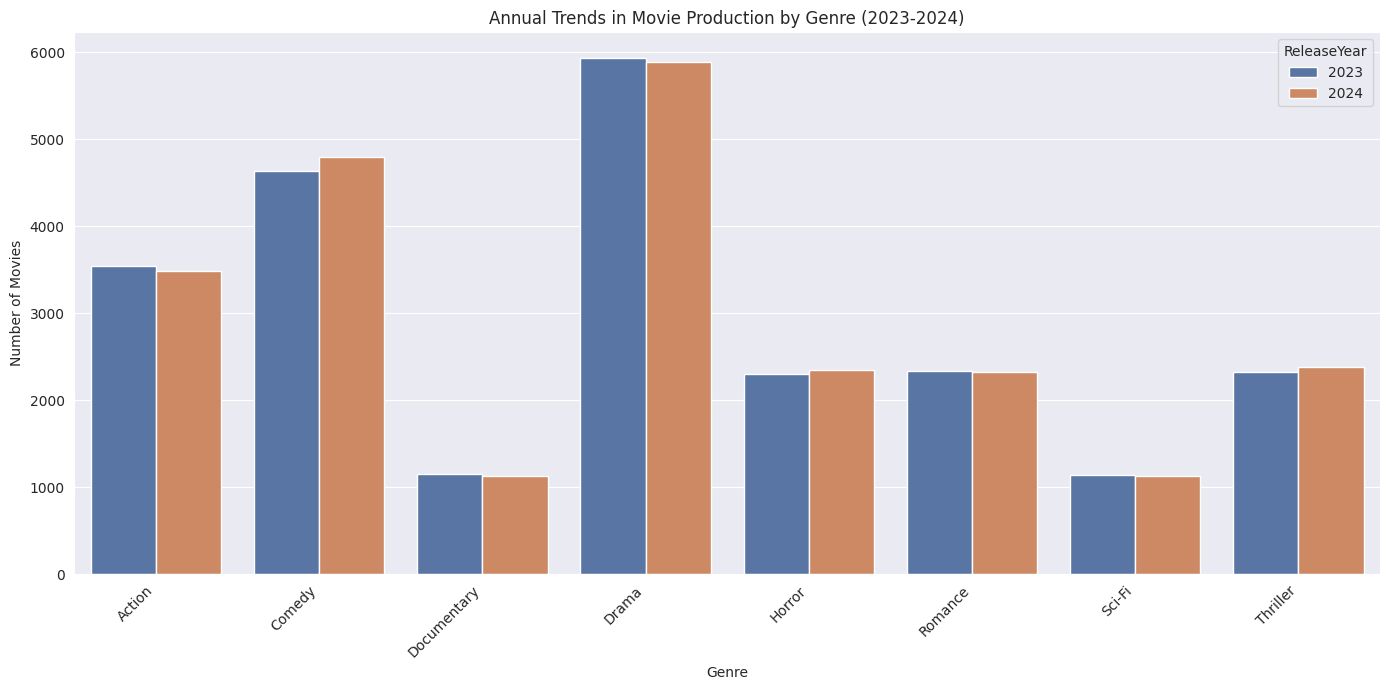

In [ ]:
# Reshape the data for plotting
genre_annual_trends_melted = genre_annual_trends.reset_index().melt('ReleaseYear', var_name='Genre', value_name='Number of Movies')

# Create a grouped bar plot
plt.figure(figsize=(14, 7))
sns.barplot(data=genre_annual_trends_melted, x='Genre', y='Number of Movies', hue='ReleaseYear', palette='deep')
plt.title('Annual Trends in Movie Production by Genre (2023-2024)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

>**Interpretation**: The number of movies released across genres in 2023 and 2024 remains largely consistent, with only minor year-to-year variations. Drama and Comedy dominate production in both years, together accounting for the largest share of releases. Action, Horror, and Thriller also show strong representation, while Documentary and Sci-Fi have comparatively fewer releases. The slight increases in Comedy, Horror, and Thriller in 2024 suggest a growing focus on these genres, whereas other categories like Action and Documentary saw small declines. Overall, the data indicates a stable trend in genre distribution, with Comedy and Drama continuing to be the most produced genres.

##3.6 Top ten performing directors
* Showcases directors with the strongest box office and critical success.

In [ ]:
# Group by director and calculate the average IMDbRating
director_avg_rating = df.groupby('Director')['IMDbRating'].mean()

# Sort in descending order and get the top 10
top_10_directors = director_avg_rating.sort_values(ascending=False).head(10)

print("Top 10 Performing Directors by Average IMDb Rating:")
display(top_10_directors)

Top 10 Performing Directors by Average IMDb Rating:


,IMDbRating
Director,
Carolyn Schwartz,6.543142
Mrs. Hannah Campbell DDS,6.538433
James Miller,6.536948
Chad Koch,6.533313
Roberto Underwood,6.524989
Ashley Medina,6.524059
Donna Wagner,6.523387
Seth Whitehead,6.523048
Jeffrey Neal,6.522790


>**Interpretation**:
The list of top-performing directors shows only a narrow difference in average IMDb ratings, with values ranging between 6.52 and 6.54. This indicates that audience reception across these directors is relatively consistent, without any major outliers. Carolyn Schwartz leads slightly with the highest average rating, suggesting strong and steady audience approval of her work. The presence of multiple directors with nearly identical ratings highlights that sustained quality direction, rather than extreme spikes, is key to achieving top positions in terms of viewer ratings.

##3.7 Top ten performing actors
* Ranks actors based on consistent performance in revenue and ratings.



In [ ]:
# Group by lead actor and calculate the average IMDbRating
actor_avg_rating = df.groupby('LeadActor')['IMDbRating'].mean()

# Sort in descending order and get the top 10
top_10_actors = actor_avg_rating.sort_values(ascending=False).head(10)

print("Top 10 Performing Actors by Average IMDb Rating:")
display(top_10_actors)

Top 10 Performing Actors by Average IMDb Rating:


,IMDbRating
LeadActor,
Meghan Mcintosh,6.566255
Meghan Johnson,6.556890
Carla Dougherty,6.554450
Jeffrey Haley,6.553223
Jennifer Cook,6.551508
Brandon Davidson,6.551028
Krystal Cross,6.547780
Morgan King,6.546569
Anthony Cross,6.546377


>**Interpretation**
The top-performing actors by IMDb rating show very close averages, ranging between 6.54 and 6.57, which indicates a relatively even level of audience appreciation across these actors. Meghan Mcintosh leads the list with the highest average rating (6.57), suggesting consistently strong performances and positive audience reception. Interestingly, the top spots are dominated by female actors, reflecting their significant impact on well-received films. The narrow rating range also suggests that actor popularity and performance quality are steady contributors to audience ratings, without major disparities among the leading names.

##3.8 Opening Week Performance vs. Lifetime Success



*   Compare Opening Day / First Week sales with Global Box Office to see if early hype actually predicts long-term performance.

In [ ]:
# Calculate correlation between Opening Day Sales, One Week Sales, and Global Box Office
opening_week_correlation = df[['Opening_Day_SalesUSD', 'One_Week_SalesUSD', 'Global_BoxOfficeUSD']].corr()

print("Correlation between Opening Day Sales, One Week Sales, and Global Box Office:")
display(opening_week_correlation)

Correlation between Opening Day Sales, One Week Sales, and Global Box Office:


,Opening_Day_SalesUSD,One_Week_SalesUSD,Global_BoxOfficeUSD
Opening_Day_SalesUSD,1.000000,0.947500,0.940976
One_Week_SalesUSD,0.947500,1.000000,0.978419
Global_BoxOfficeUSD,0.940976,0.978419,1.000000


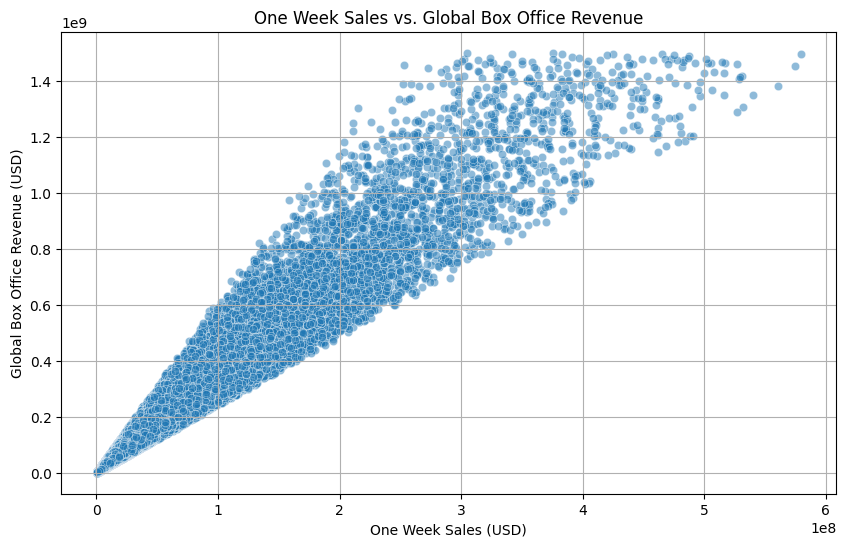

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='One_Week_SalesUSD', y='Global_BoxOfficeUSD', alpha=0.5)
plt.title('One Week Sales vs. Global Box Office Revenue')
plt.xlabel('One Week Sales (USD)')
plt.ylabel('Global Box Office Revenue (USD)')
plt.grid(True)
plt.show()

>**Interpretation**: The correlation matrix shows a very strong positive relationship between Opening Day Sales, One Week Sales, and Global Box Office revenues. Opening Day Sales correlate highly with One Week Sales (0.95) and with Global Box Office (0.94), indicating that a strong debut typically predicts long-term success. One Week Sales have the highest correlation with Global Box Office (0.98), suggesting that the first week’s performance is the best indicator of overall financial success. Overall, these results emphasize the importance of early box office momentum in driving total revenue.

##3.9 Budget vs. Revenue Analysis

*   Check whether higher-budget movies consistently deliver higher returns or if low-budget hits exist.



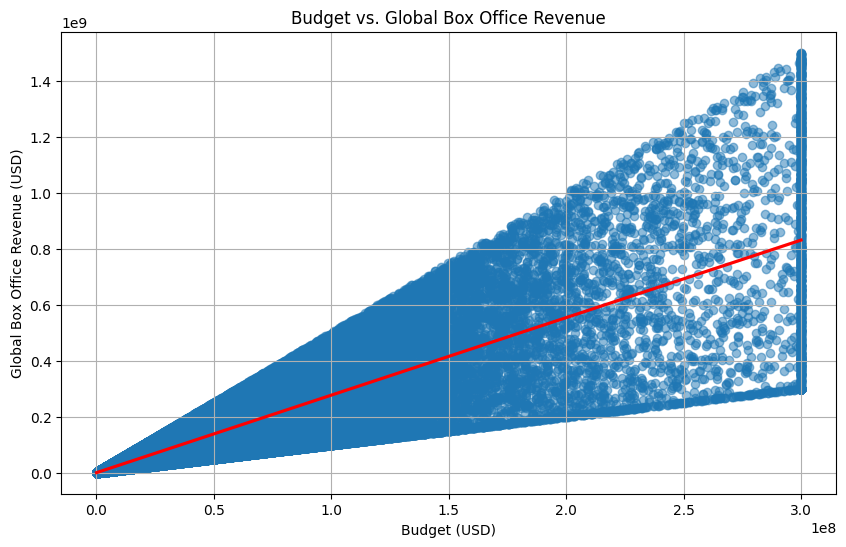

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='BudgetUSD', y='Global_BoxOfficeUSD', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Budget vs. Global Box Office Revenue')
plt.xlabel('Budget (USD)')
plt.ylabel('Global Box Office Revenue (USD)')
plt.grid(True)
plt.show()

>**Interpretation**:
The scatter plot shows a positive relationship between movie budgets and global box office revenue, as indicated by the upward-sloping red regression line. Movies with higher budgets tend to generate higher global revenues, but there is considerable spread around the trend line, suggesting that a large budget does not guarantee proportionally higher returns. Some lower-budget films achieve substantial revenue, indicating the presence of high-performing low-budget hits, while some high-budget films underperform relative to their investment. Overall, the analysis confirms that while budget is an important factor, other elements like genre, star power, marketing, and release timing also significantly influence box office success.

##3.10 Country-wise Performance / Profitability

*   Compare movies by country (USA, China, India, etc.). Look at ROI, ratings, and global reach.

In [ ]:
# Calculate ROI (Return on Investment)
# Add a small value to BudgetUSD to avoid division by zero for movies with zero budget
df['ROI'] = (df['Global_BoxOfficeUSD'] - df['BudgetUSD']) / (df['BudgetUSD'] + 1e-9)

# Group by Country and calculate the average ROI, IMDbRating, RottenTomatoesScore, and Global_BoxOfficeUSD
country_performance = df.groupby('Country').agg(
    Average_ROI=('ROI', 'mean'),
    Average_IMDbRating=('IMDbRating', 'mean'),
    Average_RottenTomatoesScore=('RottenTomatoesScore', 'mean'),
    Average_Global_BoxOfficeUSD=('Global_BoxOfficeUSD', 'mean')
).sort_values(by='Average_ROI', ascending=False) # Sort by average ROI for profitability comparison

print("Country-wise Performance and Profitability:")
display(country_performance)

Country-wise Performance and Profitability:


,Average_ROI,Average_IMDbRating,Average_RottenTomatoesScore,Average_Global_BoxOfficeUSD
Country,,,,
France,1.788264,6.488963,64.725477,2.708537e+07
South Korea,1.786599,6.481985,64.671510,2.729560e+07
Australia,1.781703,6.500383,64.832511,2.706152e+07
China,1.779204,6.497441,64.738046,2.682051e+07
USA,1.778998,6.495909,64.793493,2.718459e+07
Japan,1.777924,6.505623,64.839234,2.685979e+07
India,1.777084,6.493929,64.750549,2.734772e+07
Canada,1.774400,6.480416,64.634894,2.730466e+07
UK,1.769805,6.495503,64.797960,2.778252e+07


>**Interpretation**: The data shows that film industries across countries perform quite closely in terms of profitability and reception, with only slight differences creating competitive advantages. France and South Korea lead in terms of return on investment, indicating that their films tend to generate relatively higher financial efficiency compared to others. Japan stands out with the highest IMDb ratings and Rotten Tomatoes scores, reflecting stronger critical and audience appreciation. Meanwhile, the UK and India dominate in global box office earnings, suggesting stronger international market reach and commercial appeal. Although the overall variations are small, the insights highlight that France and South Korea excel in profitability, Japan in quality perception, and the UK and India in worldwide revenue performance.

##3.11 Decade / Year-Wise Performance Evolution

* To have a look at the historical trend (1970s–2020s) and analyze how budgets, ratings, or profitability changed over decades.

In [ ]:
# Create a 'Decade' column
df['Decade'] = (df['ReleaseYear'] // 10) * 10

# Calculate ROI (Return on Investment) if not already calculated
if 'ROI' not in df.columns:
    df['ROI'] = (df['Global_BoxOfficeUSD'] - df['BudgetUSD']) / (df['BudgetUSD'] + 1e-9)

# Group by Decade and calculate the average of relevant metrics
decade_performance = df.groupby('Decade').agg(
    Average_Budget=('BudgetUSD', 'mean'),
    Average_IMDbRating=('IMDbRating', 'mean'),
    Average_ROI=('ROI', 'mean'),
    Average_Global_BoxOffice=('Global_BoxOfficeUSD', 'mean')
).sort_values(by='Decade') # Sort by decade for chronological order

print("Decade-wise Movie Performance Evolution:")
display(decade_performance)

Decade-wise Movie Performance Evolution:


,Average_Budget,Average_IMDbRating,Average_ROI,Average_Global_BoxOffice
Decade,,,,
1950,9.912095e+06,6.494412,1.784680,2.784212e+07
1960,9.776721e+06,6.489206,1.783332,2.725149e+07
1970,9.762542e+06,6.491955,1.775240,2.707208e+07
1980,9.781633e+06,6.499545,1.781041,2.716296e+07
1990,9.719902e+06,6.488883,1.774137,2.697931e+07
2000,9.877849e+06,6.495515,1.778504,2.740004e+07
2010,9.749716e+06,6.494572,1.780547,2.696893e+07
2020,9.905543e+06,6.501069,1.776025,2.749993e+07


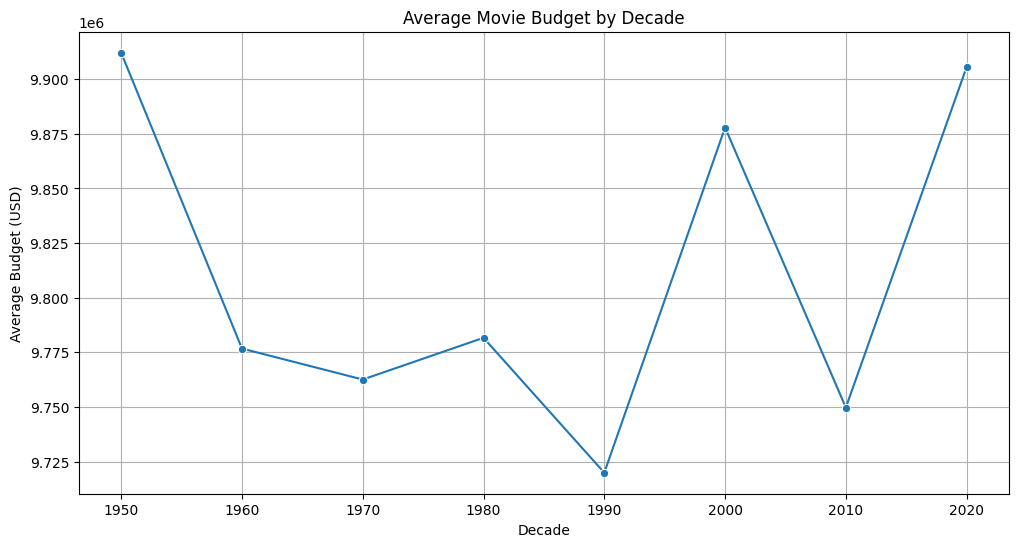

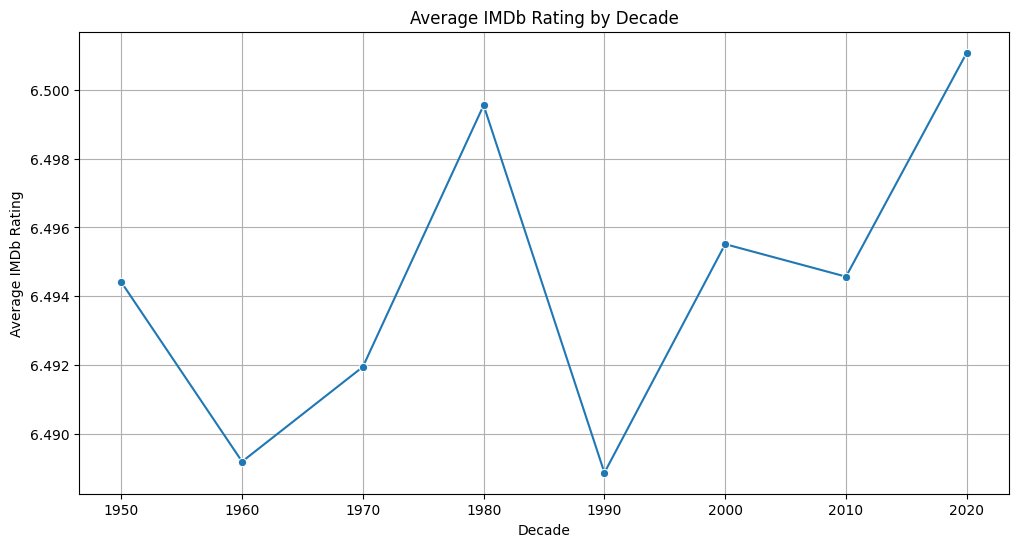

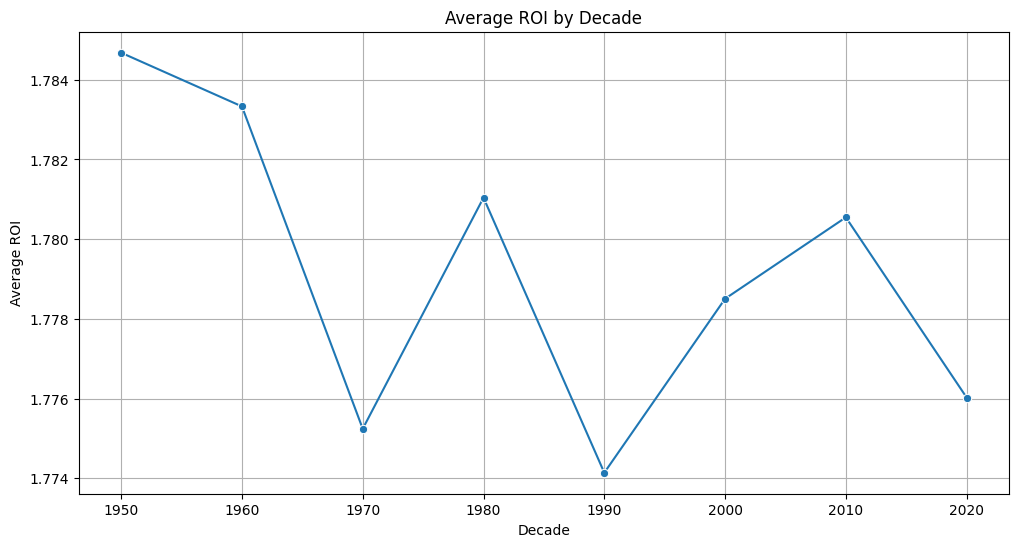

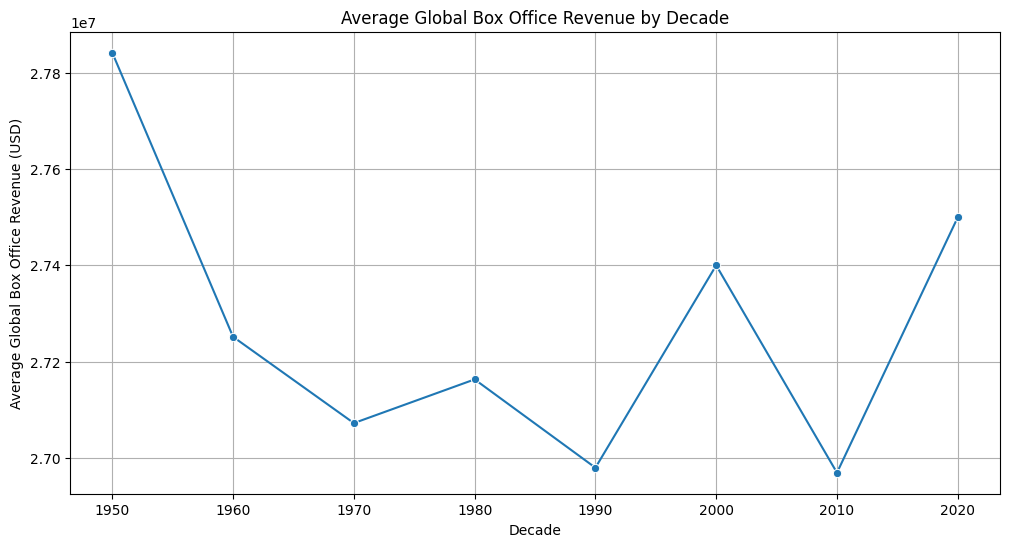

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create line plots for each performance metric over decades

# Average Budget by Decade
plt.figure(figsize=(12, 6))
sns.lineplot(data=decade_performance, x='Decade', y='Average_Budget', marker='o')
plt.title('Average Movie Budget by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Budget (USD)')
plt.grid(True)
plt.show()

# Average IMDb Rating by Decade
plt.figure(figsize=(12, 6))
sns.lineplot(data=decade_performance, x='Decade', y='Average_IMDbRating', marker='o')
plt.title('Average IMDb Rating by Decade')
plt.xlabel('Decade')
plt.ylabel('Average IMDb Rating')
plt.grid(True)
plt.show()

# Average ROI by Decade
plt.figure(figsize=(12, 6))
sns.lineplot(data=decade_performance, x='Decade', y='Average_ROI', marker='o')
plt.title('Average ROI by Decade')
plt.xlabel('Decade')
plt.ylabel('Average ROI')
plt.grid(True)
plt.show()

# Average Global Box Office by Decade
plt.figure(figsize=(12, 6))
sns.lineplot(data=decade_performance, x='Decade', y='Average_Global_BoxOffice', marker='o')
plt.title('Average Global Box Office Revenue by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Global Box Office Revenue (USD)')
plt.grid(True)
plt.show()

>**Interpretation**: The decade-wise analysis shows that movie performance has remained relatively stable over time, with only minor shifts in trends. Average budgets have consistently hovered around $9.7–9.9 million, showing no dramatic escalation across decades. IMDb ratings are also steady, mostly between 6.48 and 6.50, indicating a consistent level of audience reception. In terms of profitability, ROI peaked in the 1950s (1.78) and has shown slight fluctuations but no clear upward or downward trend, suggesting stable returns across eras. Global box office earnings have varied slightly, with the 1950s standing out at the highest average (27.84M dollars) and strong performances again in the 2000s and 2020s (27.4M–27.5M dollars). Overall, the data highlights that while technology, storytelling, and audience preferences may have evolved, the core financial and audience performance metrics of movies have remained remarkably consistent across decades.

##3.12 Critical Success vs. Commercial Success

* Correlate IMDb/RT ratings with Box Office performance. Identify "underrated" (high rating, low revenue) vs. "overrated" (low rating, high revenue) movies.

In [ ]:
# Calculate correlation between ratings and box office revenue
rating_revenue_correlation = df[['IMDbRating', 'RottenTomatoesScore', 'US_BoxOfficeUSD', 'Global_BoxOfficeUSD']].corr()

print("Correlation between Ratings and Box Office Revenue:")
display(rating_revenue_correlation)

# Identify "underrated" and "overrated" movies
# Define thresholds for high/low ratings and revenue (these can be adjusted)
imdb_threshold_high = df['IMDbRating'].quantile(0.8) # Top 20% IMDb rated
imdb_threshold_low = df['IMDbRating'].quantile(0.2)  # Bottom 20% IMDb rated
rt_threshold_high = df['RottenTomatoesScore'].quantile(0.8) # Top 20% RT rated
rt_threshold_low = df['RottenTomatoesScore'].quantile(0.2) # Bottom 20% RT rated
revenue_threshold_high = df['Global_BoxOfficeUSD'].quantile(0.8) # Top 20% revenue
revenue_threshold_low = df['Global_BoxOfficeUSD'].quantile(0.2)  # Bottom 20% revenue


# "Underrated" movies: High average rating (IMDb or RT) and low global box office revenue
underrated_movies = df[
    ((df['IMDbRating'] >= imdb_threshold_high) | (df['RottenTomatoesScore'] >= rt_threshold_high)) &
    (df['Global_BoxOfficeUSD'] <= revenue_threshold_low)
]

print("\nPotentially Underrated Movies (High Rating, Low Revenue):")
display(underrated_movies[['Title', 'Genre', 'IMDbRating', 'RottenTomatoesScore', 'Global_BoxOfficeUSD']].head(10))

# "Overrated" movies: Low average rating (IMDb or RT) and high global box office revenue
overrated_movies = df[
    ((df['IMDbRating'] <= imdb_threshold_low) | (df['RottenTomatoesScore'] <= rt_threshold_low)) &
    (df['Global_BoxOfficeUSD'] >= revenue_threshold_high)
]

print("\nPotentially Overrated Movies (Low Rating, High Revenue):")
display(overrated_movies[['Title', 'Genre', 'IMDbRating', 'RottenTomatoesScore', 'Global_BoxOfficeUSD']].head(10))

Correlation between Ratings and Box Office Revenue:


,IMDbRating,RottenTomatoesScore,US_BoxOfficeUSD,Global_BoxOfficeUSD
IMDbRating,1.000000,0.829186,0.001282,0.001211
RottenTomatoesScore,0.829186,1.000000,0.000808,0.000584
US_BoxOfficeUSD,0.001282,0.000808,1.000000,0.985941
Global_BoxOfficeUSD,0.001211,0.000584,0.985941,1.000000



Potentially Underrated Movies (High Rating, Low Revenue):


,Title,Genre,IMDbRating,RottenTomatoesScore,Global_BoxOfficeUSD
43,Majority,Horror,8.2,100,647412.82
69,However whom,Action,8.2,97,1335477.81
121,Member,Drama,8.0,68,441449.74
126,Year final,Action,7.8,87,403971.11
134,Possible yet,Comedy,6.7,82,305306.00
149,Conference why final,Romance,8.8,93,383806.38
164,Suggest fund,Thriller,7.8,81,480121.40
176,Response mission professor,Comedy,8.8,80,315031.59
183,Adult far surface,Comedy,7.8,71,517275.13
190,Big,Drama,8.3,74,680047.43



Potentially Overrated Movies (Low Rating, High Revenue):


,Title,Genre,IMDbRating,RottenTomatoesScore,Global_BoxOfficeUSD
6,Drug when,Comedy,3.6,39,6.163332e+07
15,Similar off,Drama,5.0,38,6.763993e+07
16,Accept past she somebody,Horror,4.2,36,9.671088e+07
37,Can shoulder,Thriller,4.2,27,9.676812e+07
50,Dog improve perhaps,Comedy,4.8,30,3.675224e+07
65,Owner four four,Drama,4.2,29,1.302453e+08
71,Response main,Sci-Fi,4.6,38,6.548645e+07
88,Ask clearly if,Romance,4.9,71,9.002027e+07
90,Report physical candidate,Comedy,4.9,39,5.768213e+07
106,Difference sport face,Comedy,5.7,47,3.123845e+07


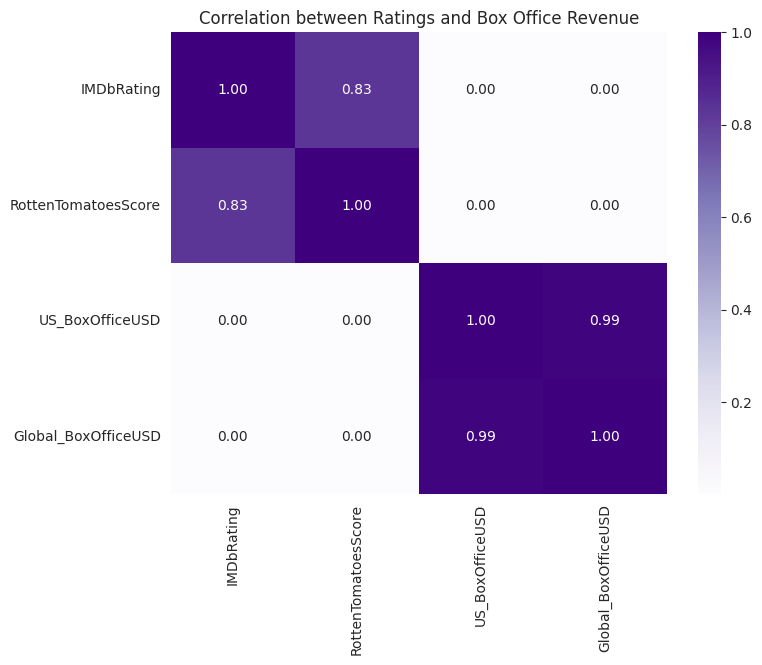

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rating_revenue_correlation, cmap = 'Purples',annot=True, fmt=".2f")
plt.title('Correlation between Ratings and Box Office Revenue')
plt.show()

**Interpretation**: The correlation and movie categorization data highlight some clear patterns about how ratings and revenues interact:

* **Weak Link Between Ratings and Revenue:**
  IMDb ratings and Rotten Tomatoes scores are strongly correlated with each other (0.83), showing that audiences and critics tend to align in their evaluations. However, both have almost no correlation with US or global box office revenues (\~0.00–0.001), indicating that **financial success is largely independent of critical or audience ratings**. On the other hand, US and global box office are almost perfectly correlated (0.99), as expected, since US performance strongly drives worldwide earnings.

* **Underrated Movies (High Ratings, Low Revenue):**
  Films like *Conference why final* (Romance, IMDb 8.8) and *Response mission professor* (Comedy, IMDb 8.8) show very strong ratings but minimal global box office returns (under \$0.7M). These examples highlight that **quality or appreciation doesn’t always translate into commercial success**, often due to limited distribution, niche genres, or weaker marketing.

* **Overrated Movies (Low Ratings, High Revenue):**
  On the other hand, movies like *Owner four four* (Drama, IMDb 4.2, \~\$130M revenue) and *Can shoulder* (Thriller, IMDb 4.2, \~\$97M revenue) earned huge box office despite poor critical/audience reception. This reflects cases where **star power, aggressive marketing, franchise pull, or mass entertainment value can drive revenue despite low quality perception**.

**Overall Insight:**
The data suggests that while ratings reflect artistic/critical merit, they have little influence on revenue generation. Commercial success often depends on external factors like marketing, star appeal, and audience hype. This creates two extremes—**underrated gems** that perform poorly at the box office despite acclaim, and **overrated blockbusters** that thrive financially despite weak reviews.


##3.13 Actor and Director Consistency

* To analyze who is the most consistent in terms of ratings or revenue across all their movies.

In [ ]:
# Analyze Director Consistency by IMDb Rating and Global Box Office Revenue
director_consistency = df.groupby('Director').agg(
    Avg_IMDbRating=('IMDbRating', 'mean'),
    Std_IMDbRating=('IMDbRating', 'std'),
    Avg_Global_BoxOffice=('Global_BoxOfficeUSD', 'mean'),
    Std_Global_BoxOffice=('Global_BoxOfficeUSD', 'std')
).dropna() # Drop directors with only one movie (std dev would be NaN)

print("Director Consistency (Sorted by Std Dev of IMDb Rating - Lower is More Consistent):")
display(director_consistency.sort_values(by='Std_IMDbRating').head(10))

print("\nDirector Consistency (Sorted by Std Dev of Global Box Office - Lower is More Consistent):")
display(director_consistency.sort_values(by='Std_Global_BoxOffice').head(10))


# Analyze Actor Consistency by IMDb Rating and Global Box Office Revenue
actor_consistency = df.groupby('LeadActor').agg(
    Avg_IMDbRating=('IMDbRating', 'mean'),
    Std_IMDbRating=('IMDbRating', 'std'),
    Avg_Global_BoxOffice=('Global_BoxOfficeUSD', 'mean'),
    Std_Global_BoxOffice=('Global_BoxOfficeUSD', 'std')
).dropna() # Drop actors with only one movie (std dev would be NaN)

print("\nActor Consistency (Sorted by Std Dev of IMDb Rating - Lower is More Consistent):")
display(actor_consistency.sort_values(by='Std_IMDbRating').head(10))

print("\nActor Consistency (Sorted by Std Dev of Global Box Office - Lower is More Consistent):")
display(actor_consistency.sort_values(by='Std_Global_BoxOffice').head(10))

Director Consistency (Sorted by Std Dev of IMDb Rating - Lower is More Consistent):


,Avg_IMDbRating,Std_IMDbRating,Avg_Global_BoxOffice,Std_Global_BoxOffice
Director,,,,
Oscar Santos,6.477289,1.454174,2.817497e+07,7.092569e+07
Jeremy Davis,6.488165,1.456938,2.646215e+07,7.167429e+07
Dr. Michael Monroe,6.496006,1.459873,2.786022e+07,6.919298e+07
Chad Koch,6.533313,1.463624,2.677634e+07,6.822199e+07
Shannon Ross,6.503976,1.465089,2.928641e+07,7.824219e+07
Chad Peters MD,6.494706,1.465908,2.757804e+07,6.973589e+07
Patricia Munoz,6.499896,1.465985,2.783496e+07,6.926538e+07
James Cross,6.477861,1.466065,2.728331e+07,6.477063e+07
Andrew Chambers,6.468593,1.466630,2.658233e+07,6.610938e+07



Director Consistency (Sorted by Std Dev of Global Box Office - Lower is More Consistent):


,Avg_IMDbRating,Std_IMDbRating,Avg_Global_BoxOffice,Std_Global_BoxOffice
Director,,,,
David Perez,6.491782,1.470737,2.680134e+07,6.051413e+07
Roberto Underwood,6.524989,1.483865,2.640064e+07,6.063051e+07
Francisco Ford,6.503186,1.508710,2.496208e+07,6.087888e+07
Bethany Rodriguez,6.494150,1.502183,2.589055e+07,6.093269e+07
Jennifer Miller,6.495768,1.475404,2.596931e+07,6.097652e+07
Kayla Young,6.487270,1.470882,2.535239e+07,6.136525e+07
Raymond Morris,6.504974,1.485666,2.676490e+07,6.170608e+07
Michael Richards,6.515325,1.498839,2.512409e+07,6.181097e+07
Mr. Drew Clark Jr.,6.520401,1.505714,2.686759e+07,6.250281e+07



Actor Consistency (Sorted by Std Dev of IMDb Rating - Lower is More Consistent):


,Avg_IMDbRating,Std_IMDbRating,Avg_Global_BoxOffice,Std_Global_BoxOffice
LeadActor,,,,
Jennifer Hall,6.497154,1.426987,2.619609e+07,6.474471e+07
Monica Nelson MD,6.470752,1.444232,2.889453e+07,7.779192e+07
Sarah Ross,6.486465,1.444583,2.786980e+07,7.469223e+07
Benjamin Mitchell,6.482102,1.451231,2.650124e+07,7.659575e+07
Lucas Collins,6.483847,1.451896,2.514173e+07,6.719014e+07
Brittany James,6.487519,1.452341,2.632425e+07,6.136003e+07
John Ross,6.477758,1.453982,2.729259e+07,7.102137e+07
Brian Rodriguez,6.492628,1.454017,2.722646e+07,7.410925e+07
Catherine Rogers,6.486430,1.454576,2.621933e+07,6.425706e+07



Actor Consistency (Sorted by Std Dev of Global Box Office - Lower is More Consistent):


,Avg_IMDbRating,Std_IMDbRating,Avg_Global_BoxOffice,Std_Global_BoxOffice
LeadActor,,,,
Cindy Barnes,6.463493,1.484526,2.371912e+07,5.140674e+07
Rodney Smith,6.515961,1.517225,2.533451e+07,5.211376e+07
Stephanie Stokes,6.540250,1.511934,2.536072e+07,5.641525e+07
Elizabeth Holmes,6.475103,1.490154,2.528829e+07,5.685132e+07
Samuel Wyatt,6.499273,1.485192,2.512136e+07,5.729024e+07
Richard Davis,6.541275,1.487573,2.578663e+07,5.735378e+07
Sabrina Massey,6.468397,1.483471,2.676414e+07,5.746030e+07
Gabriel Mathis,6.494622,1.461890,2.517267e+07,5.755160e+07
John Sullivan,6.476891,1.510608,2.573598e+07,5.843060e+07


**Interpretation**:


**Director Consistency (Ratings)**

When looking at IMDb rating consistency, Oscar Santos, Jeremy Davis, and Dr. Michael Monroe emerge as the most reliable directors, with the lowest standard deviation in IMDb scores (\~1.45–1.46). This means their films are generally rated within a narrow band, reflecting a steady quality output. Directors like Mary Mitchell and Andrew Chambers** show slightly higher variation (\~1.47), suggesting their films fluctuate more in reception.

Insight: Some directors maintain a consistent creative signature and audience reception, while others deliver more variable outcomes.


**Director Consistency (Box Office)**

From a revenue perspective, David Perez and Roberto Underwood show the lowest box office variability, meaning their films tend to perform within a predictable revenue range. In contrast, Charlotte Williams and Mr. Drew Clark Jr. have higher variation, indicating bigger swings between hits and misses.

Insight: Certain directors may not always deliver critically consistent films, but they manage to maintain stable commercial returns, while others take on higher-risk projects with fluctuating revenues.


**Actor Consistency (Ratings)**

Among actors, **Jennifer Hall** stands out as the most consistent, with the lowest IMDb rating deviation (1.43). Others like Monica Nelson MD and Sarah Ross also show strong steadiness (\~1.44), suggesting their films receive fairly predictable audience/critic scores. Actors such as Ashley Juarez and John Ross have slightly higher variability, indicating occasional critical hits and misses.

Insight: Some actors are safe bets for consistently rated films, likely due to strong role choices or typecasting into stable genres.


**Actor Consistency (Box Office)**

Looking at financial consistency, Cindy Barnes, Rodney Smith, and Stephanie Stokes show the least variability in global box office (\~\$51–56M standard deviation), meaning their films are commercially predictable even if not massive blockbusters. Actors like John Sullivan and Becky Dean show higher variability, reflecting participation in both box office hits and underperformers.

Insight: Certain actors help deliver steady commercial outcomes, while others take on a mix of high-reward but higher-risk projects.


**Overall Takeaway:**

* Some directors (e.g., Oscar Santos, David Perez) and actors (e.g., Jennifer Hall, Cindy Barnes) show predictable performance, making them reliable choices for studios seeking stability.
* Others exhibit higher variability, which could mean greater risk but also greater potential reward, their projects can swing between critical acclaim/box office hits and underperformance.

---


##3.14 Genre Profitability Ratios (ROI by Genre)

* Calculate (Global Box Office ÷ Budget) for each genre it shows which genres are most cost-effective.

In [ ]:
# Calculate ROI (Return on Investment) if not already calculated
# Add a small value to BudgetUSD to avoid division by zero for movies with zero budget
if 'ROI' not in df.columns:
    df['ROI'] = (df['Global_BoxOfficeUSD'] - df['BudgetUSD']) / (df['BudgetUSD'] + 1e-9)

# Group by Genre and calculate the average ROI
genre_roi = df.groupby('Genre')['ROI'].mean().sort_values(ascending=False)

print("Average ROI by Genre (Sorted in Descending Order):")
display(genre_roi)

Average ROI by Genre (Sorted in Descending Order):


,ROI
Genre,
Horror,1.786394
Action,1.784029
Comedy,1.779269
Sci-Fi,1.777241
Thriller,1.775387
Drama,1.775171
Documentary,1.775105
Romance,1.774279


>**Interpretation**: The data shows that Horror (1.79) and Action (1.78) films deliver the highest average ROI, indicating they are the most financially efficient genres. Comedy (1.78) and Sci-Fi (1.78) also perform strongly, suggesting broad audience appeal and good revenue potential relative to costs. In contrast, Drama, Documentary, and Romance sit at the lower end (~1.77), showing slightly weaker returns, likely because they rely more on niche or critical appreciation rather than mass-market commercial pull. Overall, the interpretation is that high-concept, mass-appeal genres (Horror, Action, Comedy, Sci-Fi) generate stronger returns, while story-driven or niche genres (Drama, Documentary, Romance) tend to be less profitable despite cultural or critical value.

---

#**MANAGERIAL INSIGHTS**

#### **1. Profitability and Genre Performance**

**Big Budgets, Big Profits:** Your data shows that films with large budgets (around $300 million) can generate enormous profits, with returns of nearly five times the initial investment. This suggests that while high-budget projects are risky, they offer the highest potential for blockbuster success. To maximize this potential, focus on popular genres like **Comedy** and **Drama**, which have proven to be consistently profitable.

**Financial Efficiency:** While big-budget blockbusters drive the highest raw profits, **Horror**, **Action**, and **Comedy** offer the best return on investment (ROI). These genres are often more financially efficient, delivering strong returns relative to their production costs. A balanced portfolio should include a mix of high-risk, high-reward blockbusters and efficient, high-ROI films.

**Revenue Consistency:** Films from **France**, **South Korea**, the **UK**, and **India** demonstrate strong profitability and market reach. To expand your global footprint, consider co-production or distribution deals with partners in these countries. They have a proven track record of generating strong returns and reaching international audiences.

#### **2. The Influence of Talent and Consistency**

**Director and Actor Reliability:** Your data identifies directors and actors who are a "safe bet" for steady performance. **Oscar Santos** and **David Perez** consistently deliver on audience ratings and box office performance, respectively. Similarly, actors like **Jennifer Hall** and **Cindy Barnes** bring predictability to a project. When assembling a team for a project where a stable return is the primary goal, prioritize these reliable individuals.

**Balancing Risk and Reward:** On the other hand, some directors (**Charlotte Williams**) and actors (**John Sullivan**) show higher variability, with some projects becoming huge hits and others underperforming. These individuals are suitable for high-risk, high-reward projects where the potential for a massive hit outweighs the risk of a flop.

#### **3. The Commercial Life Cycle of a Film**

**Early Momentum is Everything:** Your analysis confirms that a film’s first week is the most critical indicator of its overall success. **Opening Day Sales** are highly correlated with **One Week Sales** and **Global Box Office**, with the first week's performance being the strongest predictor of total revenue. This highlights the importance of front-loading your marketing efforts to drive strong initial attendance.

**Ratings vs. Revenue:** Your data reveals a critical disconnect: a film's financial success is largely independent of its critical or audience ratings. You have examples of films that were both critically acclaimed but commercially unsuccessful, and films that were box office hits despite poor reviews.

* **For blockbusters**, focus on aggressive marketing, star power, and franchise appeal. These factors drive revenue even if the film receives poor reviews.
* **For critically acclaimed films**, understand that high ratings alone will not guarantee commercial success. These films often need targeted marketing to their specific audience segments to be profitable.

#### **4. Historical Trends and Future Projections**

**Consistent Performance Over Time:** The film industry has maintained remarkable stability over the past few decades. Average budgets, audience ratings, and profitability have remained consistent since the 1950s. This suggests that the core principles of filmmaking and audience reception have not drastically changed, despite technological advancements.

**Genre Production:** Production trends are stable, with **Drama** and **Comedy** consistently dominating the market. However, a slight increase in **Horror** and **Thriller** releases in 2024 suggests growing opportunities in these genres.

---

##**Actionable Recommendations**

* **Diversify Your Portfolio:** Invest in a mix of high-budget, high-profit potential films (especially in **Comedy** and **Drama**) and financially efficient films with high ROI (**Horror**, **Action**).
* **Front-Load Your Marketing:** A film's first week is its most important. Plan your marketing and distribution strategy to maximize opening weekend and first-week sales.
* **Align Talent with Goals:** For projects needing stable, predictable returns, hire talent known for consistency. For higher-risk, potentially higher-reward projects, partner with talent who have a history of both hits and misses.
* **Separate Art from Commerce:** Recognize that a film's critical reception and its financial success are two different metrics. Develop separate strategies for marketing critically-acclaimed films versus mass-appeal blockbusters.
* **Expand Global Partnerships:** Explore co-production or distribution agreements with countries like **France**, **South Korea**, the **UK**, and **India** to tap into their proven profitability and global reach.

---

# Dashboard
Different category of graphs are shown in different tabs


/tmp/ipython-input-1430324482.py:6: UserWarning: Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.
  pn.extension()


/tmp/ipython-input-1430324482.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index, palette='viridis', ax=ax_country)
/tmp/ipython-input-1430324482.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_discrepancy, y='Genre', order=df_discrepancy['Genre'].value_counts().index, palette='Dark2', ax=ax_discrepancy_genre)


Column
    [0] Markdown(str)
    [1] Tabs
        [0] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
        [1] Column
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
        [2] Column
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
            [2] Matplotlib(Figure)
        [3] Column
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
            [2] Matplotlib(Figure)
            [3] Matplotlib(Figure)
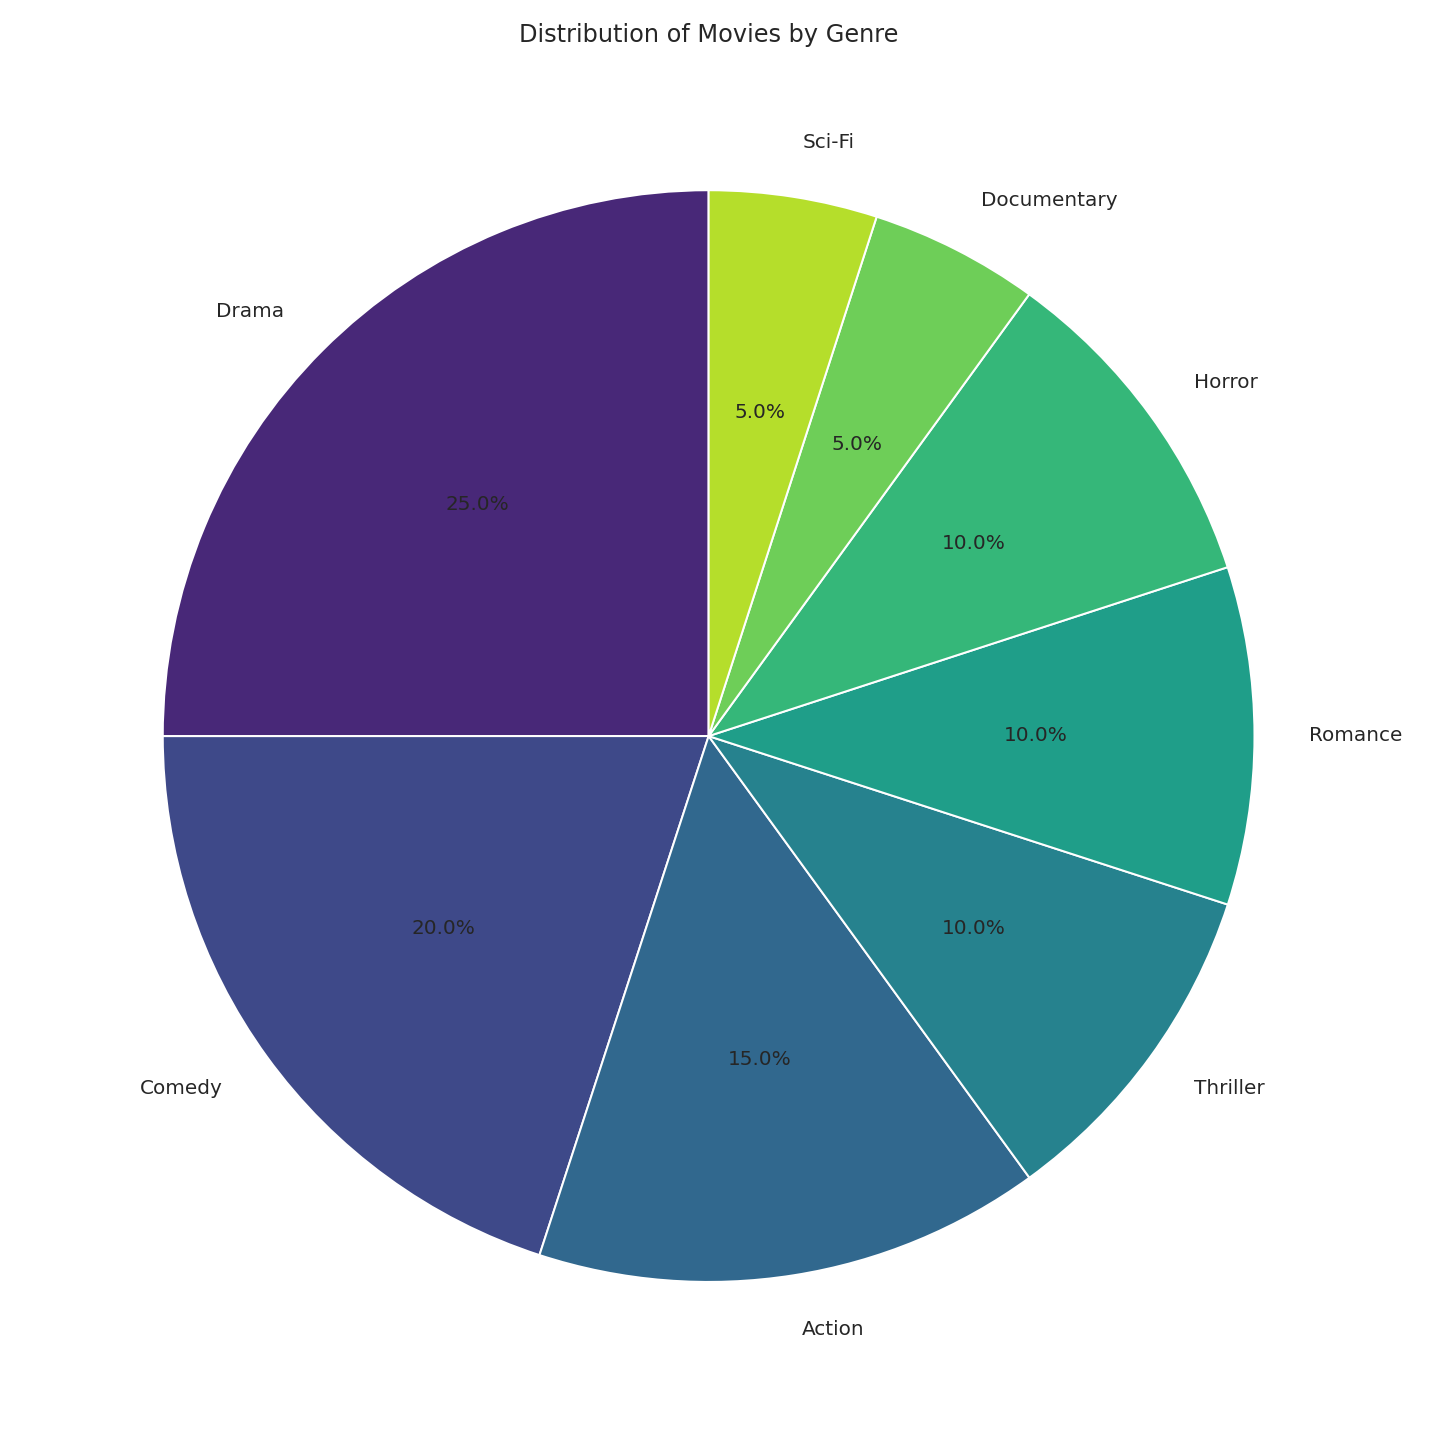
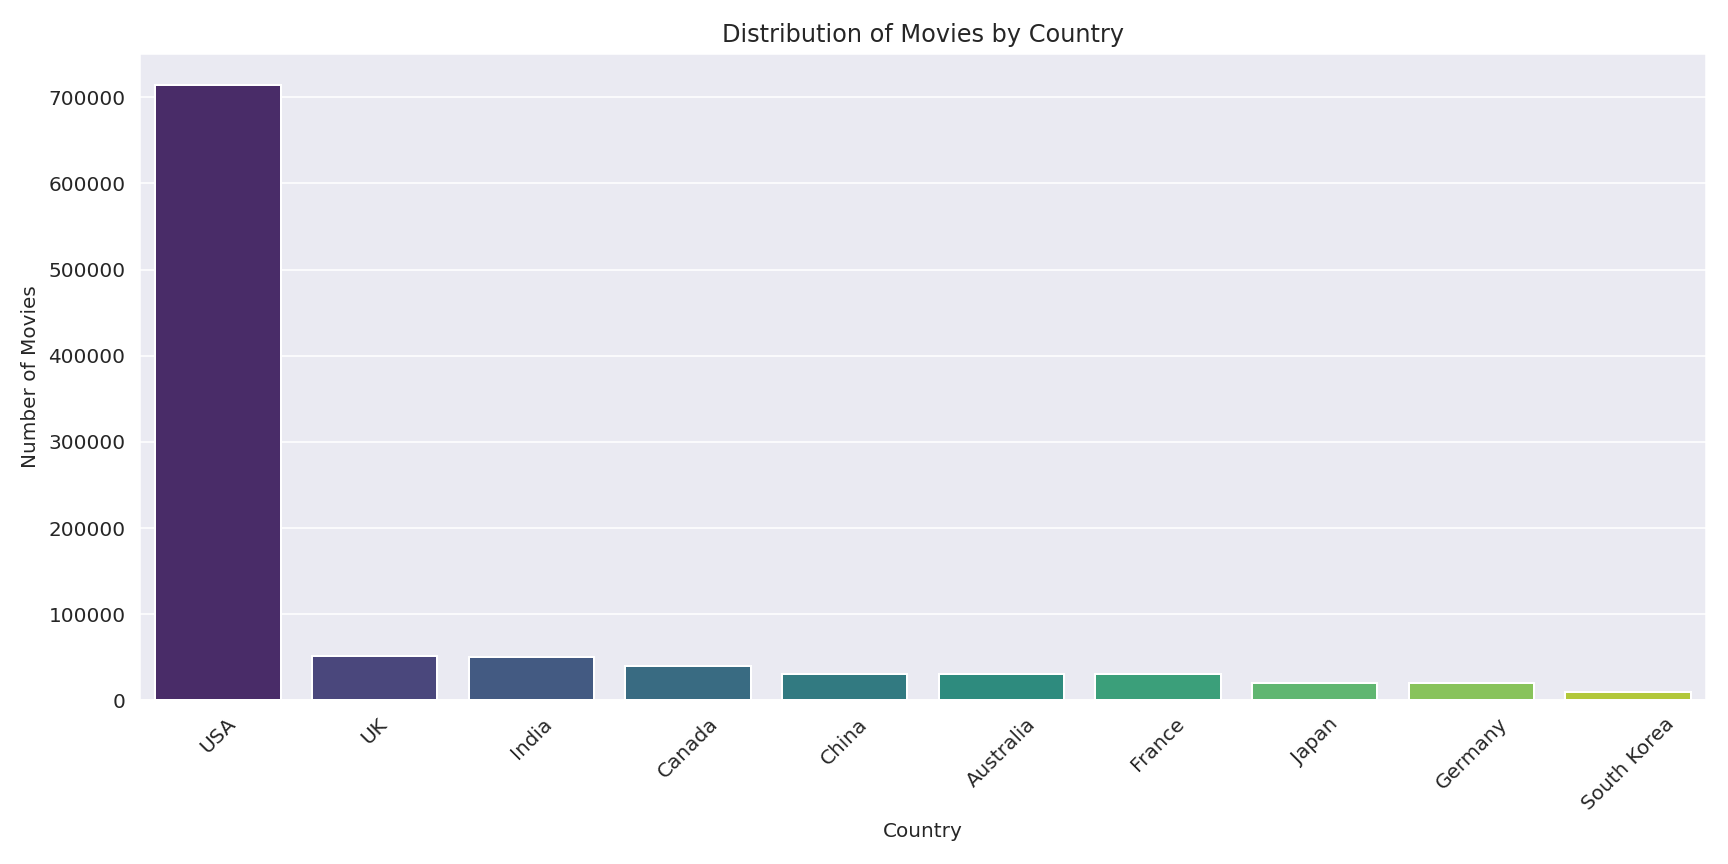
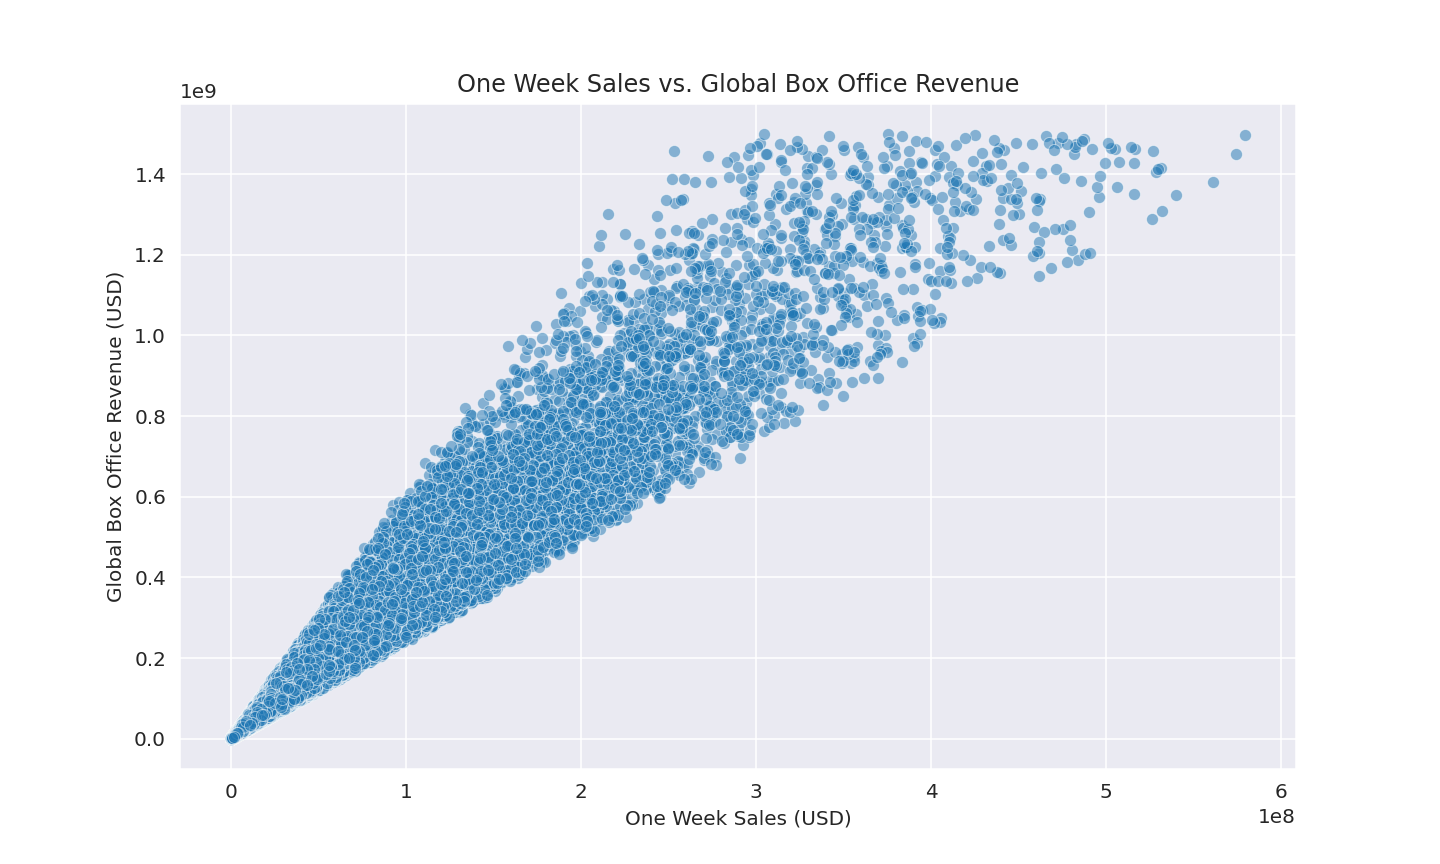
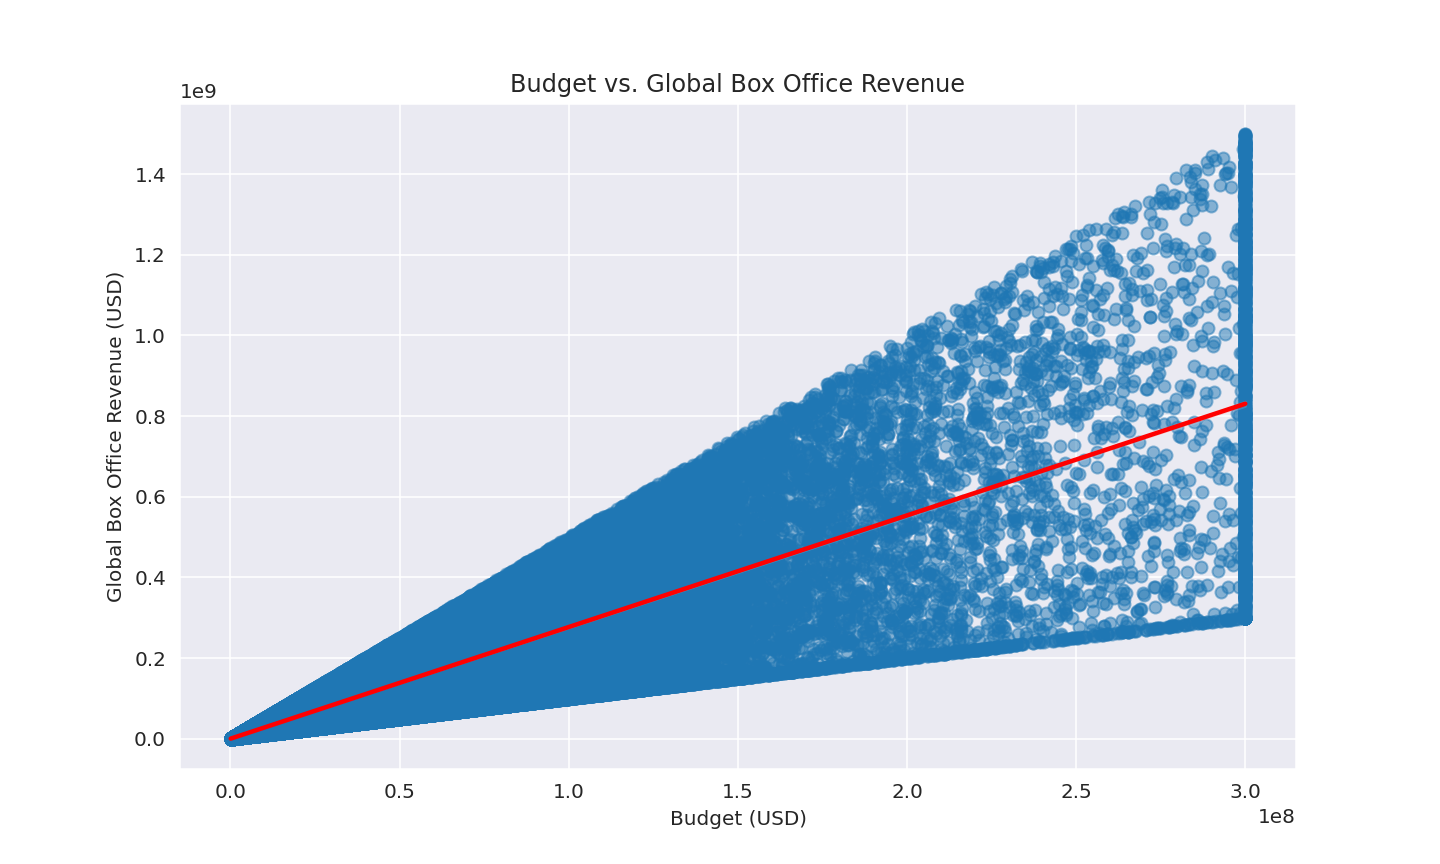
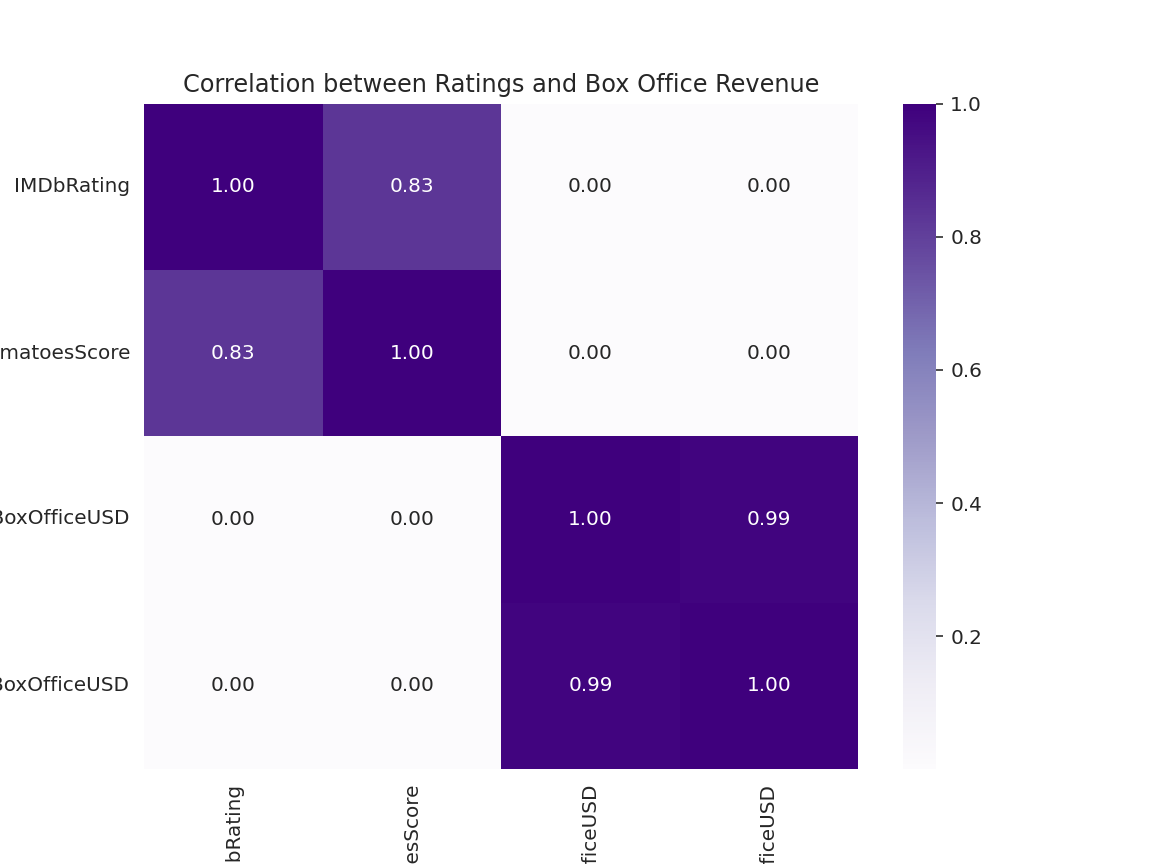
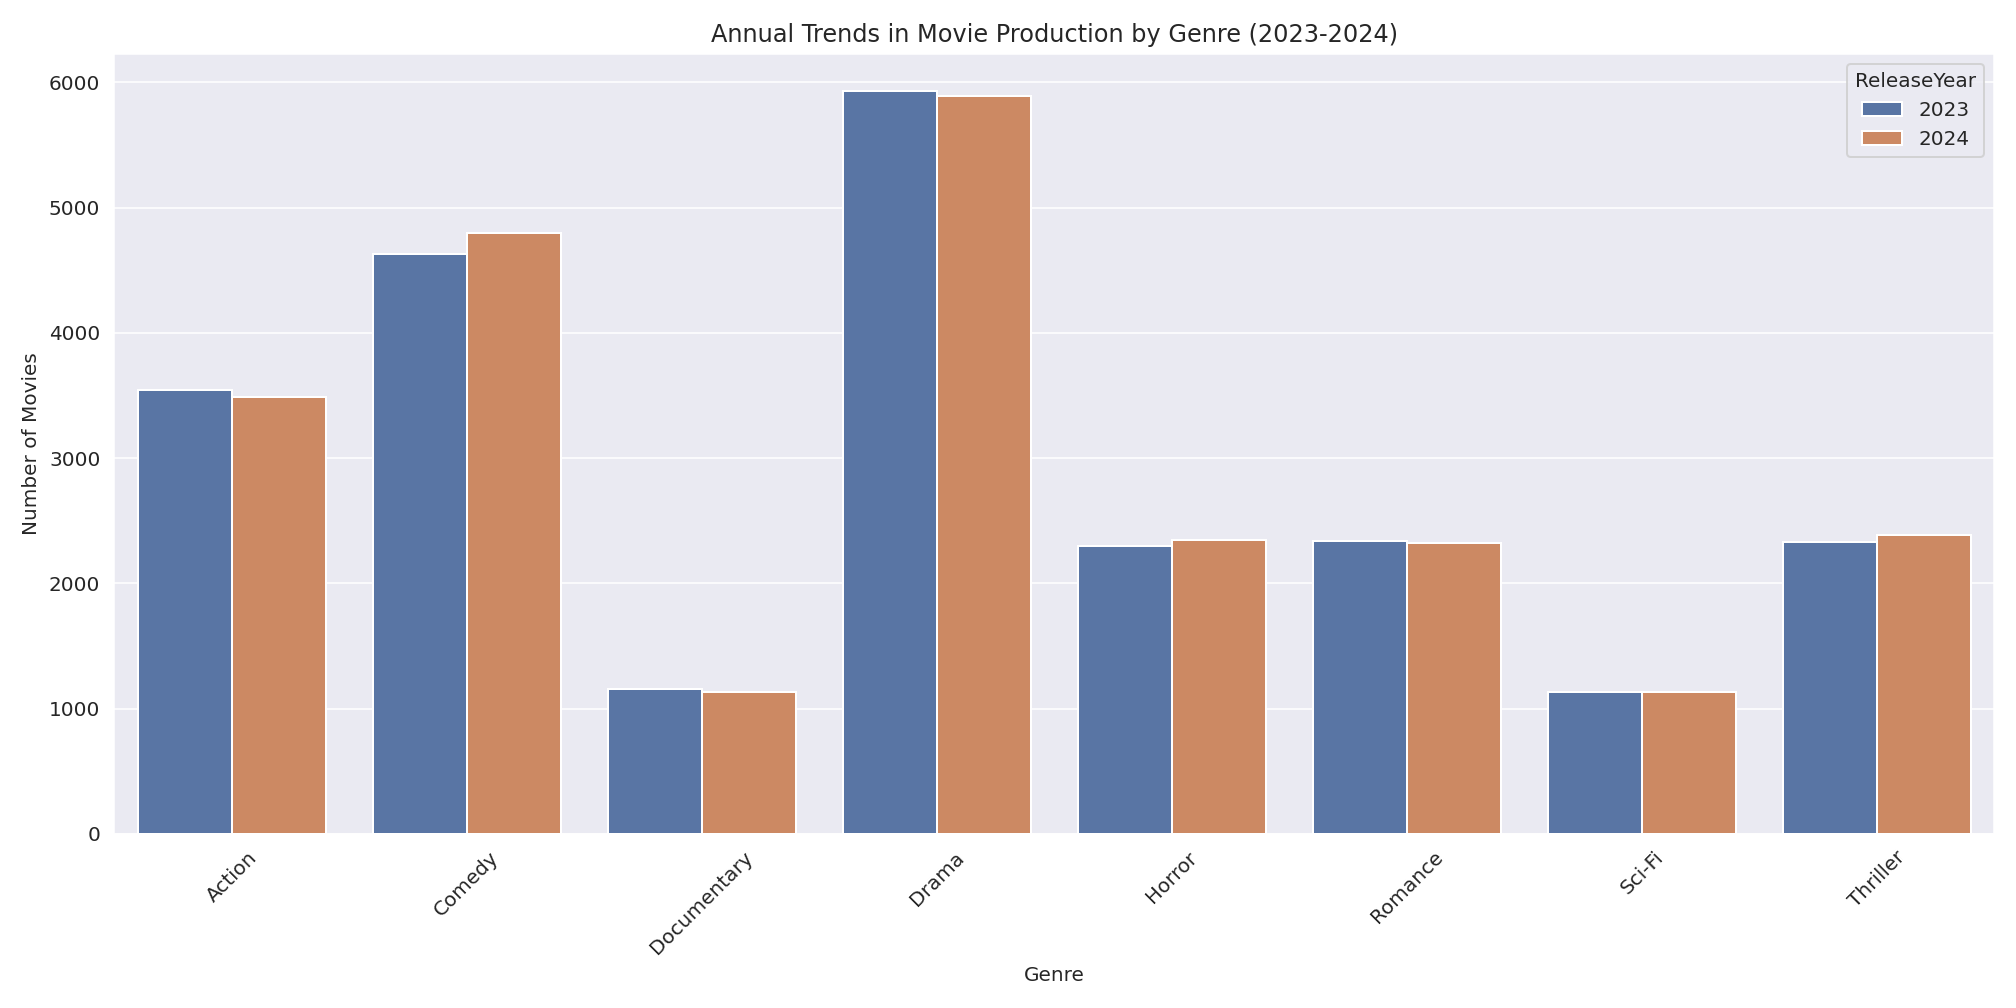
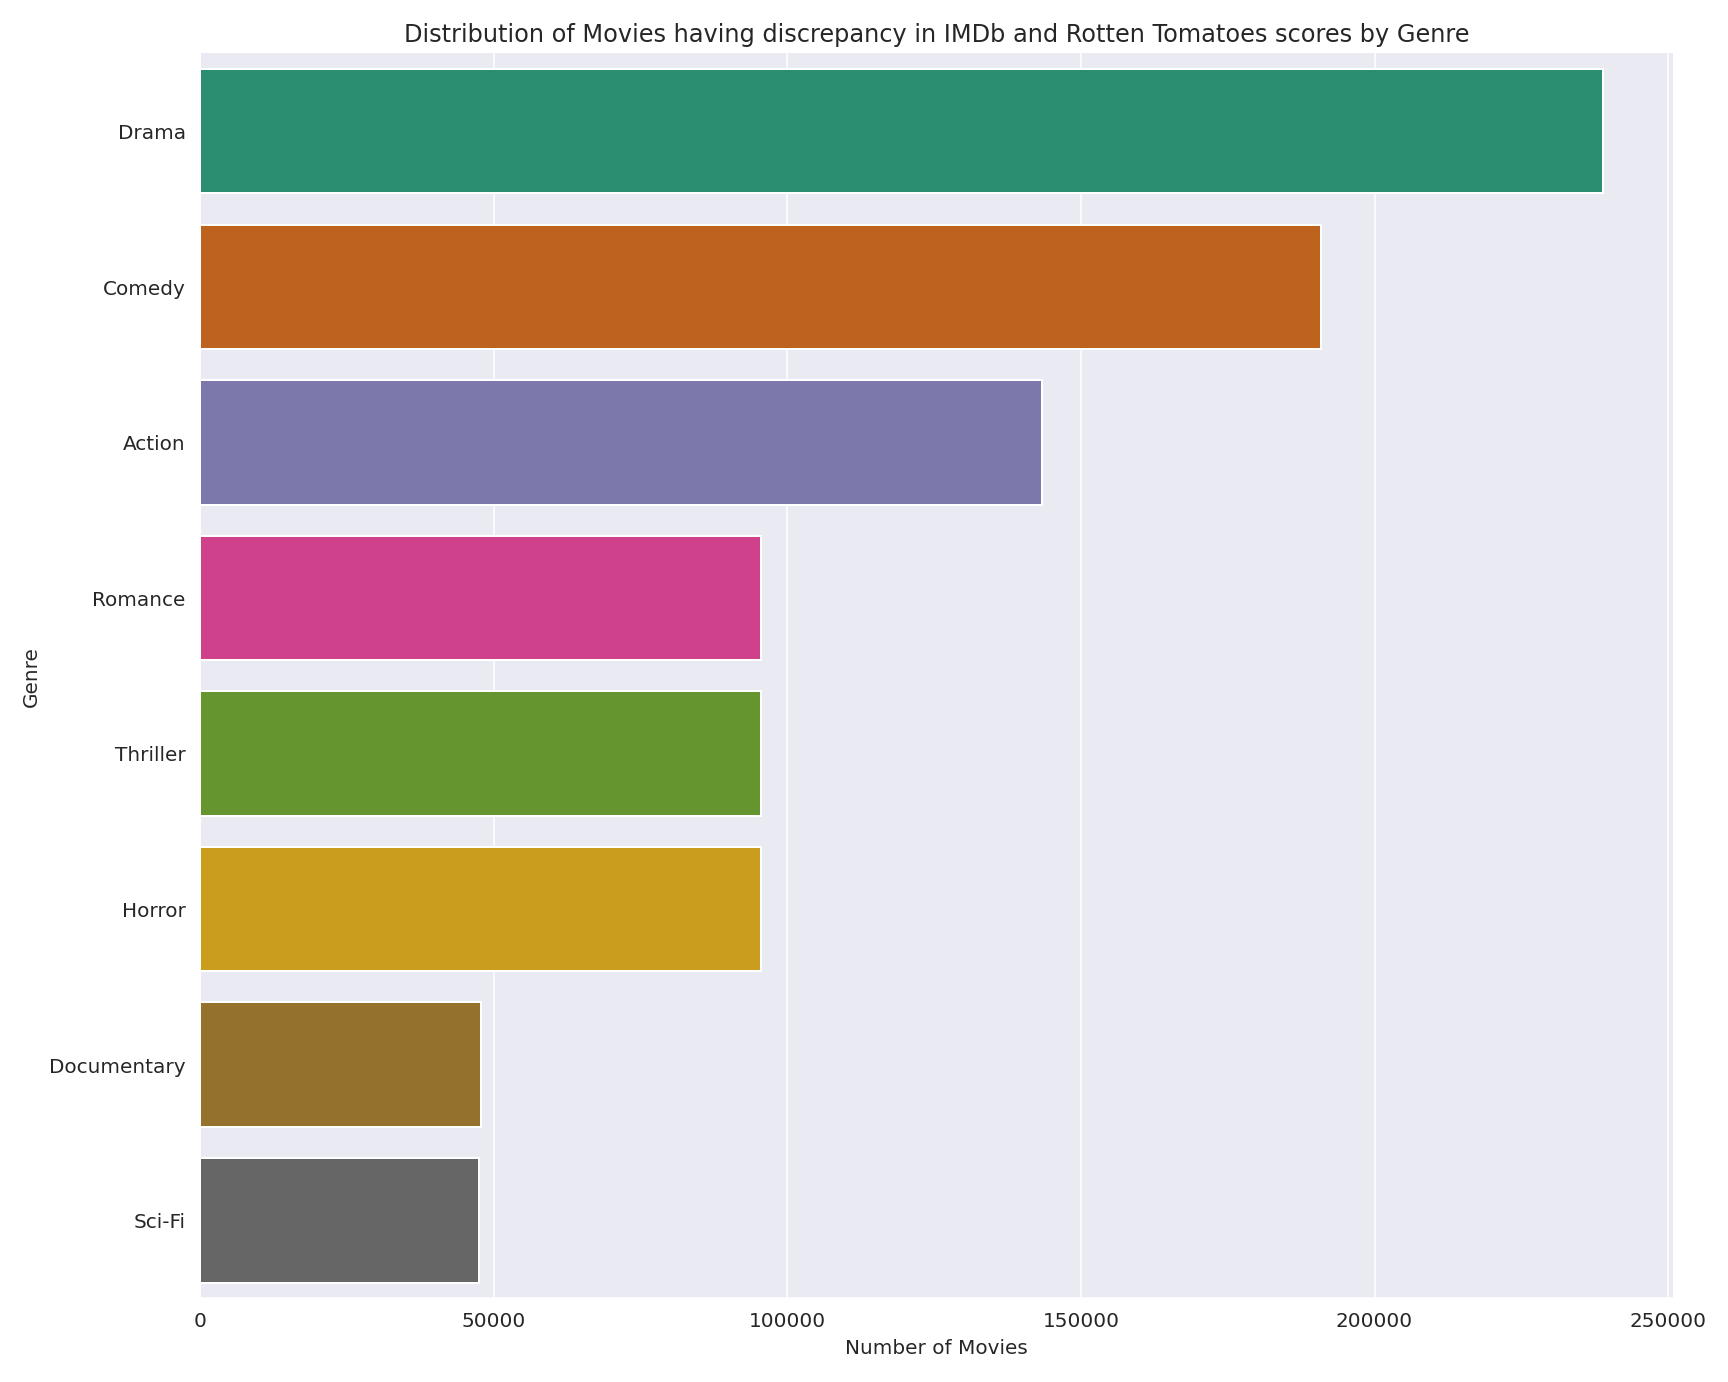
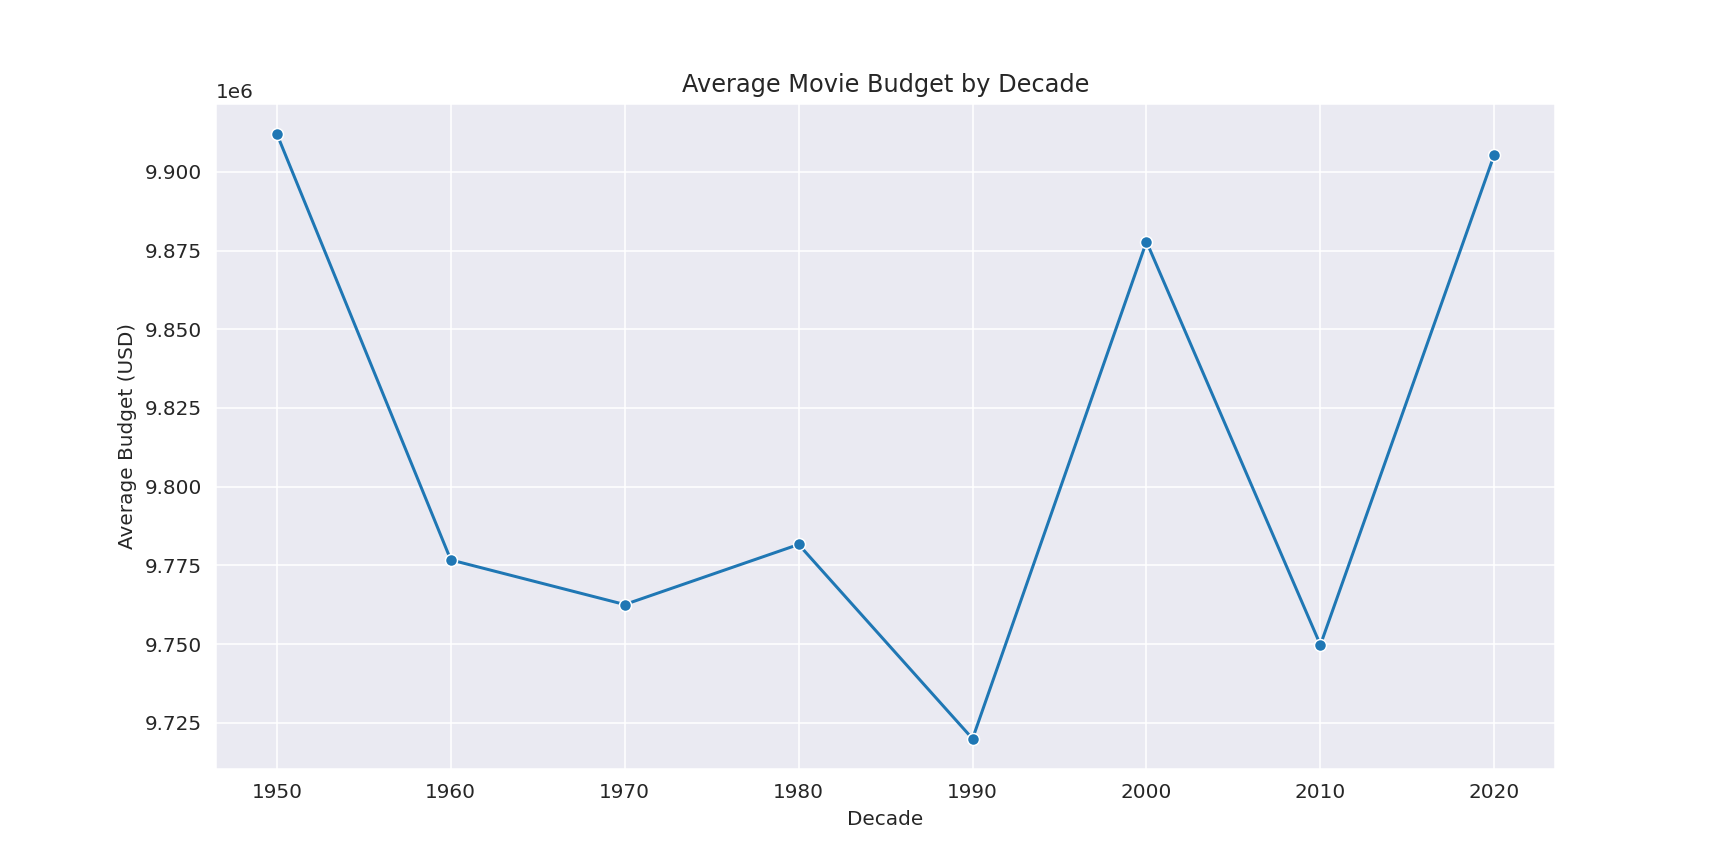
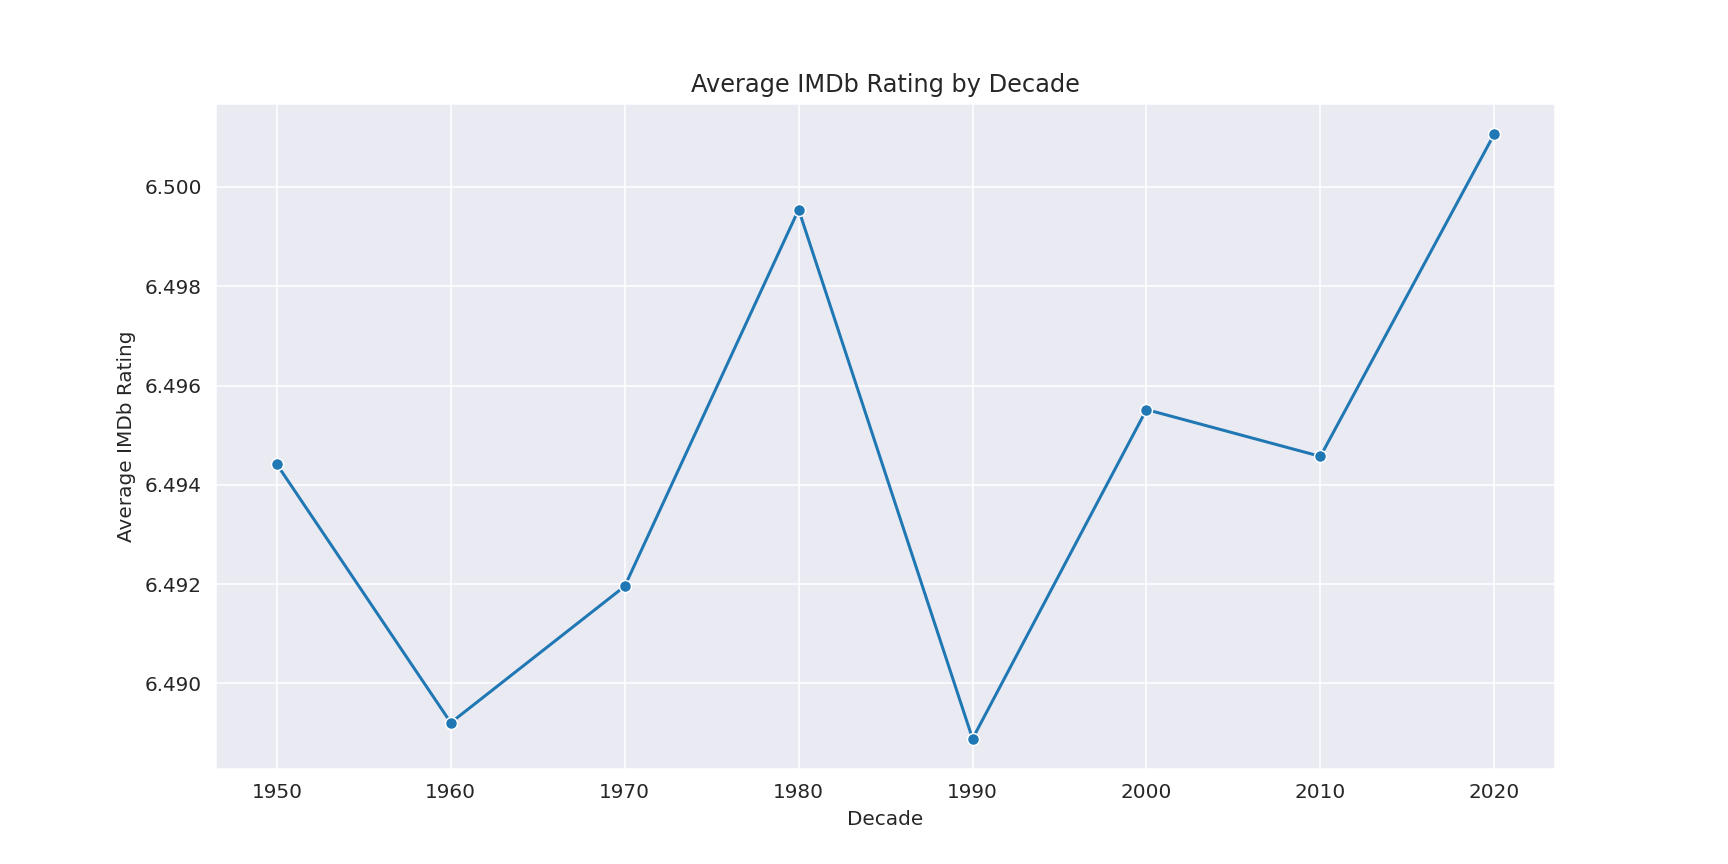
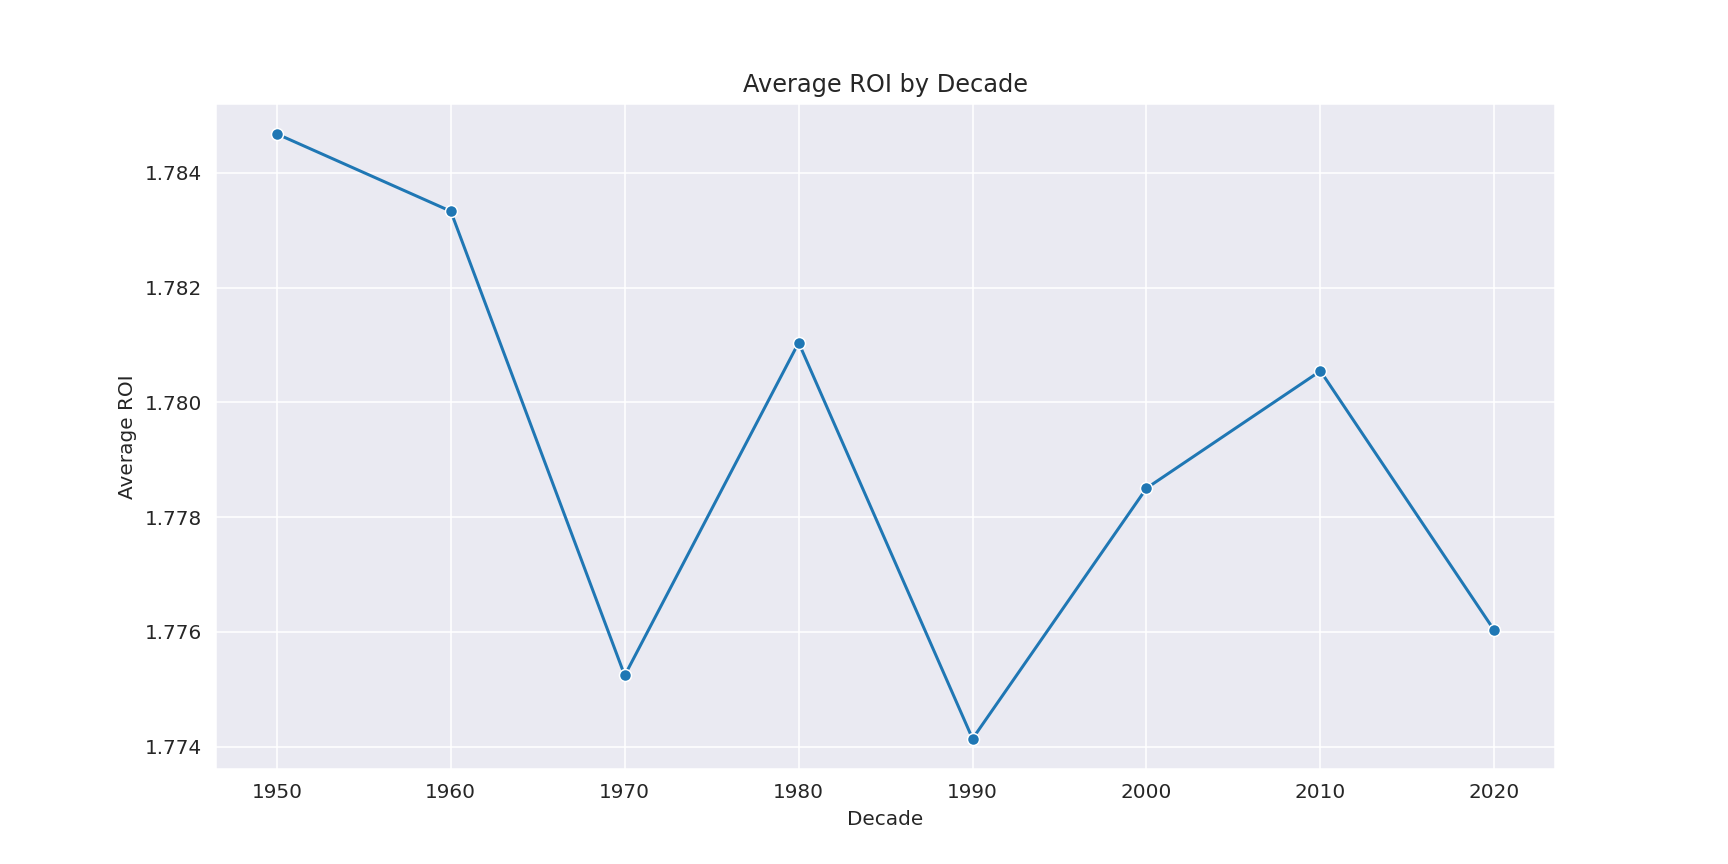
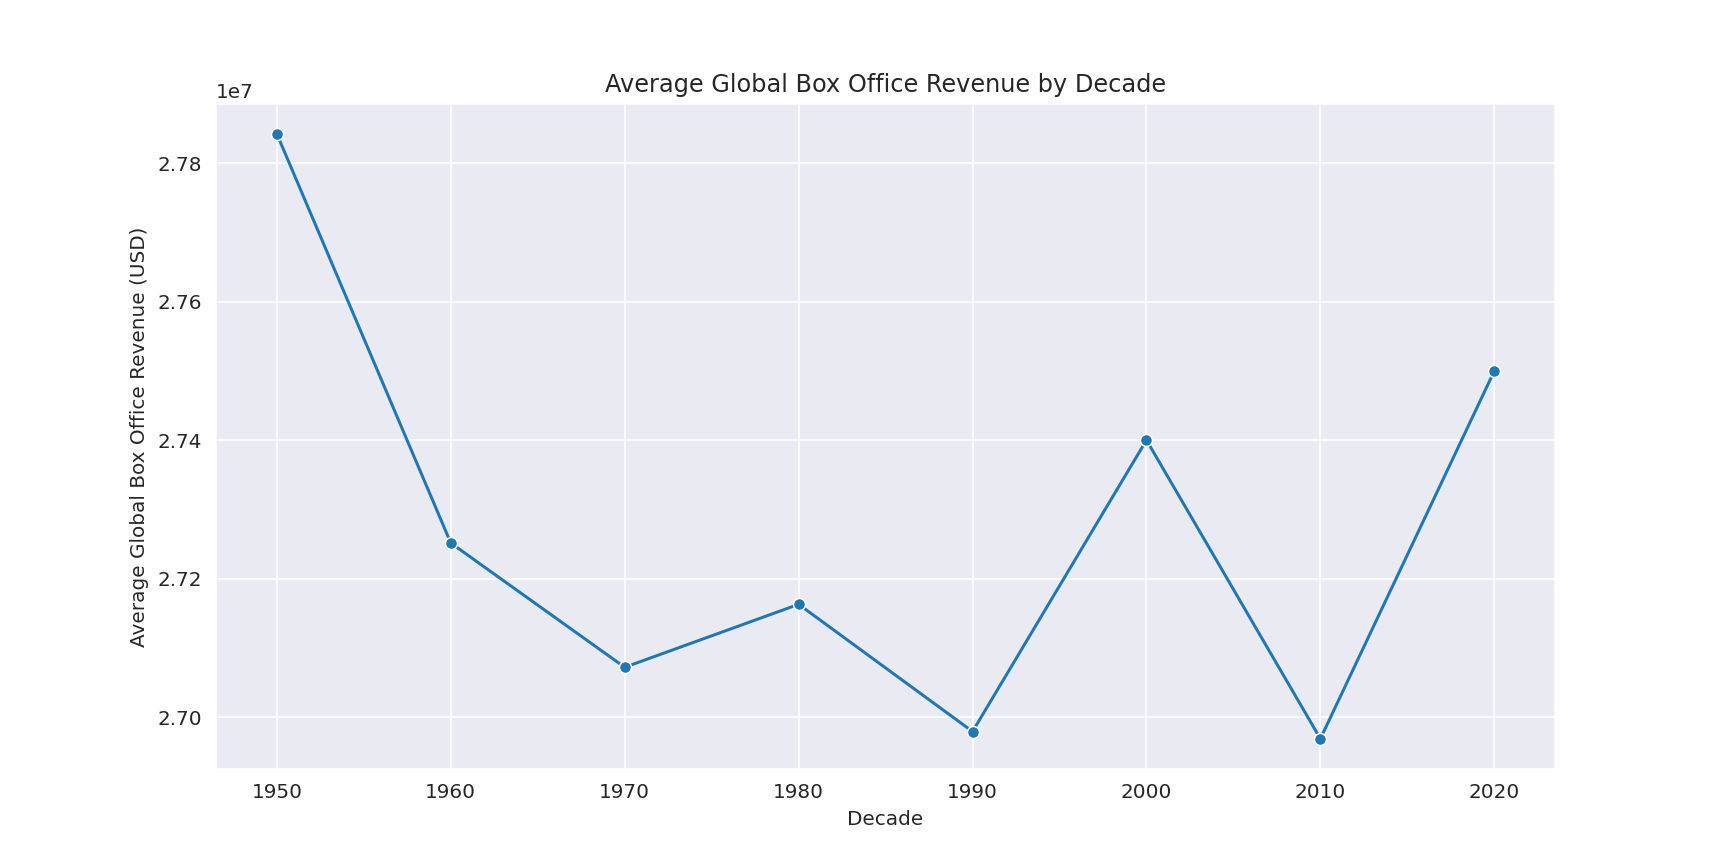

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn

# Ensure Panel is loaded
pn.extension()

# Regenerate the plots as Matplotlib figures and close them

# Create a bar plot for 'Country'
fig_country, ax_country = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index, palette='viridis', ax=ax_country)
ax_country.set_title('Distribution of Movies by Country')
ax_country.set_xlabel('Country')
ax_country.set_ylabel('Number of Movies')
ax_country.tick_params(axis='x', rotation=45)
plt.tight_layout()

# Create a pie chart for 'Genre' distribution
fig_genre_pie, ax_genre_pie = plt.subplots(figsize=(10, 10))
df['Genre'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(df['Genre'].unique())), ax=ax_genre_pie)
ax_genre_pie.set_title('Distribution of Movies by Genre')
ax_genre_pie.set_ylabel('') # Remove default 'Genre' label on y-axis
plt.tight_layout()
plt.close(fig_genre_pie)

# Create a scatter plot for Opening Week Sales vs. Global Box Office
fig_opening_week_scatter, ax_opening_week_scatter = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='One_Week_SalesUSD', y='Global_BoxOfficeUSD', alpha=0.5, ax=ax_opening_week_scatter)
ax_opening_week_scatter.set_title('One Week Sales vs. Global Box Office Revenue')
ax_opening_week_scatter.set_xlabel('One Week Sales (USD)')
ax_opening_week_scatter.set_ylabel('Global Box Office Revenue (USD)')
ax_opening_week_scatter.grid(True)
plt.close(fig_opening_week_scatter) # Close the figure

# Create a scatter plot for Budget vs. Global Box Office Revenue
fig_budget_revenue_scatter, ax_budget_revenue_scatter = plt.subplots(figsize=(10, 6))
sns.regplot(data=df, x='BudgetUSD', y='Global_BoxOfficeUSD', scatter_kws={'alpha':0.5}, line_kws={"color": "red"}, ax=ax_budget_revenue_scatter)
ax_budget_revenue_scatter.set_title('Budget vs. Global Box Office Revenue')
ax_budget_revenue_scatter.set_xlabel('Budget (USD)')
ax_budget_revenue_scatter.set_ylabel('Global Box Office Revenue (USD)')
ax_budget_revenue_scatter.grid(True)
plt.close(fig_budget_revenue_scatter) # Close the figure

# Create a heatmap of the correlation matrix
fig_rating_revenue_heatmap, ax_rating_revenue_heatmap = plt.subplots(figsize=(8, 6))
sns.heatmap(df[['IMDbRating', 'RottenTomatoesScore', 'US_BoxOfficeUSD', 'Global_BoxOfficeUSD']].corr(), annot=True, cmap='Purples', fmt=".2f", ax=ax_rating_revenue_heatmap)
ax_rating_revenue_heatmap.set_title('Correlation between Ratings and Box Office Revenue')
plt.close(fig_rating_revenue_heatmap) # Close the figure

# Create a grouped bar plot for annual trends in movie production by genre
# Filter the DataFrame for the years 2023 and 2024
df_2023_2024 = df[df['ReleaseYear'].isin([2023, 2024])]
# Group by ReleaseYear and Genre and count the number of movies
genre_annual_trends = df_2023_2024.groupby(['ReleaseYear', 'Genre']).size().unstack(fill_value=0)
# Reshape the data for plotting
genre_annual_trends_melted = genre_annual_trends.reset_index().melt('ReleaseYear', var_name='Genre', value_name='Number of Movies')
fig_genre_annual_trends_plot, ax_genre_annual_trends_plot = plt.subplots(figsize=(14, 7))
sns.barplot(data=genre_annual_trends_melted, x='Genre', y='Number of Movies', hue='ReleaseYear', palette='deep', ax=ax_genre_annual_trends_plot)
ax_genre_annual_trends_plot.set_title('Annual Trends in Movie Production by Genre (2023-2024)')
ax_genre_annual_trends_plot.set_xlabel('Genre')
ax_genre_annual_trends_plot.set_ylabel('Number of Movies')
ax_genre_annual_trends_plot.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.close(fig_genre_annual_trends_plot) # Close the figure

# Plot for discrepancy between IMDb and Rotten Tomatoes scores by Genre
# Calculate the absolute difference between normalized scores
df['IMDbRating_normalized'] = df['IMDbRating'] * 10
df['Rating_Discrepancy'] = abs(df['IMDbRating_normalized'] - df['RottenTomatoesScore'])
# Filter for movies with discrepancy (you might want to define a threshold for "significant discrepancy")
# For now, let's just plot the distribution of genres for all movies with a discrepancy > 0
df_discrepancy = df[df['Rating_Discrepancy'] > 0]

fig_discrepancy_genre, ax_discrepancy_genre = plt.subplots(figsize=(12, 1.2 * len(df_discrepancy['Genre'].unique())))
sns.countplot(data=df_discrepancy, y='Genre', order=df_discrepancy['Genre'].value_counts().index, palette='Dark2', ax=ax_discrepancy_genre)
ax_discrepancy_genre.set_title('Distribution of Movies having discrepancy in IMDb and Rotten Tomatoes scores by Genre')
ax_discrepancy_genre.set_xlabel('Number of Movies')
ax_discrepancy_genre.spines[['top', 'right',]].set_visible(False)
plt.tight_layout()
plt.close(fig_discrepancy_genre)


# Create a 'Decade' column
df['Decade'] = (df['ReleaseYear'] // 10) * 10

# Calculate ROI (Return on Investment) if not already calculated
if 'ROI' not in df.columns:
    df['ROI'] = (df['Global_BoxOfficeUSD'] - df['BudgetUSD']) / (df['BudgetUSD'] + 1e-9)

# Group by Decade and calculate the average of relevant metrics
decade_performance = df.groupby('Decade').agg(
    Average_Budget=('BudgetUSD', 'mean'),
    Average_IMDbRating=('IMDbRating', 'mean'),
    Average_ROI=('ROI', 'mean'),
    Average_Global_BoxOffice=('Global_BoxOfficeUSD', 'mean')
).sort_values(by='Decade') # Sort by decade for chronological order

# Create line plots for each performance metric over decades

# Average Budget by Decade
fig_avg_budget, ax_avg_budget = plt.subplots(figsize=(12, 6))
sns.lineplot(data=decade_performance, x='Decade', y='Average_Budget', marker='o', ax=ax_avg_budget)
ax_avg_budget.set_title('Average Movie Budget by Decade')
ax_avg_budget.set_xlabel('Decade')
ax_avg_budget.set_ylabel('Average Budget (USD)')
ax_avg_budget.grid(True)
plt.close(fig_avg_budget)

# Average IMDb Rating by Decade
fig_avg_imdb, ax_avg_imdb = plt.subplots(figsize=(12, 6))
sns.lineplot(data=decade_performance, x='Decade', y='Average_IMDbRating', marker='o', ax=ax_avg_imdb)
ax_avg_imdb.set_title('Average IMDb Rating by Decade')
ax_avg_imdb.set_xlabel('Decade')
ax_avg_imdb.set_ylabel('Average IMDb Rating')
ax_avg_imdb.grid(True)
plt.close(fig_avg_imdb)

# Average ROI by Decade
fig_avg_roi, ax_avg_roi = plt.subplots(figsize=(12, 6))
sns.lineplot(data=decade_performance, x='Decade', y='Average_ROI', marker='o', ax=ax_avg_roi)
ax_avg_roi.set_title('Average ROI by Decade')
ax_avg_roi.set_xlabel('Decade')
ax_avg_roi.set_ylabel('Average ROI')
ax_avg_roi.grid(True)
plt.close(fig_avg_roi)

# Average Global Box Office by Decade
fig_avg_global_box_office, ax_avg_global_box_office = plt.subplots(figsize=(12, 6))
sns.lineplot(data=decade_performance, x='Decade', y='Average_Global_BoxOffice', marker='o', ax=ax_avg_global_box_office)
ax_avg_global_box_office.set_title('Average Global Box Office Revenue by Decade')
ax_avg_global_box_office.set_xlabel('Decade')
ax_avg_global_box_office.set_ylabel('Average Global Box Office Revenue (USD)')
ax_avg_global_box_office.grid(True)
plt.close(fig_avg_global_box_office)



# Create a layout for the dashboard
dashboard = pn.Column(
    "## Movie Data Analysis Dashboard",
    pn.Tabs(
        ("Country and Genre Distribution", pn.Row(fig_genre_pie,fig_country)),
        ("Revenue Analysis", pn.Column(fig_opening_week_scatter, fig_budget_revenue_scatter)),
        ("Ratings and Correlation", pn.Column(fig_rating_revenue_heatmap, fig_genre_annual_trends_plot, fig_discrepancy_genre)),
        ("Decade-wise Performance", pn.Column(fig_avg_budget, fig_avg_imdb, fig_avg_roi, fig_avg_global_box_office))

    )
)

# Display the dashboard
dashboard